# Aula 5 - KNN e ferramentas especiais

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Ferramentas Especiais
- 2) KNN para regressão

____
____
____

## Exercício da aula passada

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, r2_score

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score

In [4]:
df = pd.read_csv("insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df['target'] = np.where(df['charges'] < 10000, 0, np.where(df['charges'] < 30000, 1, 2))

In [11]:
df

,age,sex,bmi,children,smoker,region,charges,target,flag_sex,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [9]:
df['flag_sex'] = np.where(df['sex'] == 'female', 1, 0)

In [10]:
df['is_smoker'] = np.where(df['smoker'] == 'yes', 1, 0)

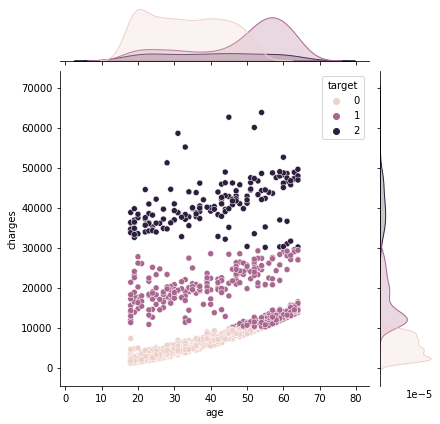

In [8]:
sns.jointplot(data=df, x='age', y='charges', hue='target')

In [12]:
X = df.drop(['charges', 'target', 'sex', 'smoker', 'region'], axis = 1)
y = df["target"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

#==================

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

#=====================

model = KNeighborsClassifier(n_neighbors=10)

model.fit(X_train_std, y_train)

y_pred = model.predict(X_test_std)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       143
           1       0.89      0.75      0.81        93
           2       0.96      0.84      0.90        32

    accuracy                           0.88       268
   macro avg       0.90      0.85      0.87       268
weighted avg       0.88      0.88      0.87       268



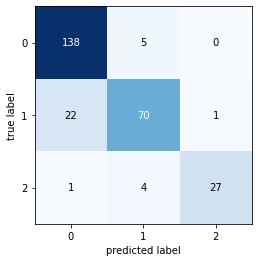

In [17]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

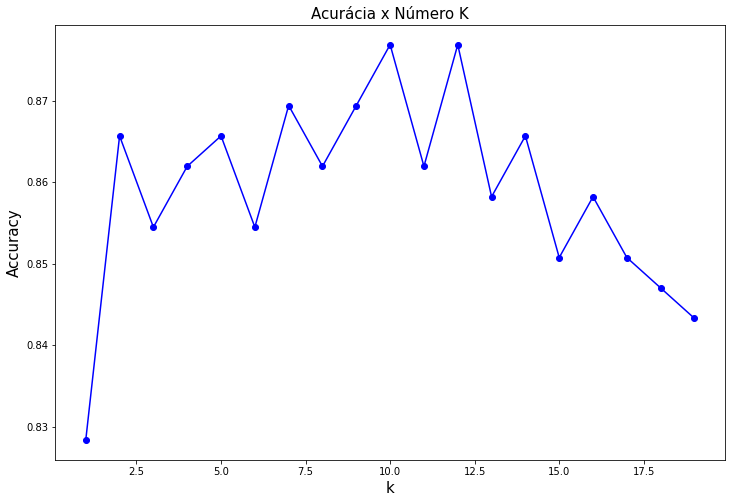

Melhor k: 10


In [15]:
from sklearn.metrics import accuracy_score

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

ks = []
accuracys = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    accuracys.append(acc)
    ks.append(k)

plt.figure(figsize=(12,8))
plt.plot(ks, accuracys, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Acurácia x Número K', fontsize = 15)
plt.show(True)
best_k = np.argmax(accuracys)+1
print('Melhor k:', best_k)

## 1) Ferramentas especiais

Vamos agora ver algumas ferramentas especiais do sklearn que nos ajudam no desenvolvimento de modelos!

### Pipeline

O [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) é uma estrutura que o sklearn proporciona a fim de garantir que possamos em uma única estrutura passar **o estimador e o transformador** (e muitas outras coisas). Para maiores informações, [clique aqui](https://scikit-learn.org/stable/modules/compose.html#pipeline). 

Vamos ver a seguir como esta estrutura funciona:

**Para o train-test split normal**

In [20]:
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

[[71  1]
 [ 4 38]]


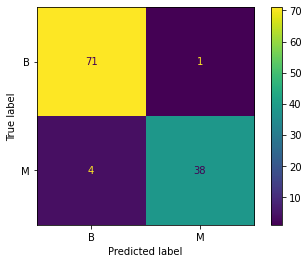

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


# ====================

[[284   1]
 [  9 161]]


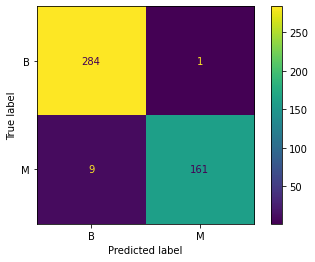

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       285
           M       0.99      0.95      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



In [18]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y) ## Utilizamos quando há desbalanceamento
## Desbalanceamento -> Distribuição mais "enviesada" do que um 60% - 40%

# ====================

# argumento: um lista de tuplas do tipo [("nome da estrutura", classe instanciada da estrutura)]
# na sequencia em que as estruturas (procedimentos) são aplicadas
lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe = Pipeline(lista_etapas).fit(X_train, y_train)

# ====================

y_pred_test = pipe.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = pipe.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

**Para a validação cruzada**

Isso resolve o problema que tivemos na última aula de vazamento de dados na validação cruzada!

In [21]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe = Pipeline(lista_etapas)

# ====================

grupo = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

results = cross_validate(estimator=pipe,
                         X=X_train, y=y_train,
                         cv=grupo,
                         scoring=metrica,
                         return_train_score=True)

df_results = pd.DataFrame(results)

In [22]:
df_results

,fit_time,score_time,test_score,train_score
0,0.004769,0.005000,0.900000,0.950000
1,0.003999,0.004001,0.956522,0.945578
2,0.003000,0.004000,0.950000,0.946667
3,0.002996,0.004002,1.000000,0.934211
4,0.002998,0.004000,0.909091,0.949686
5,0.006003,0.003999,0.900000,0.940000
6,0.004001,0.006000,0.900000,0.946667
7,0.005081,0.004995,0.882353,0.941176
8,0.003002,0.002998,0.750000,0.949367
9,0.003000,0.004000,0.947368,0.933775


In [23]:
# com isso, resolvemos os problemas que tínhamos anteriormente de vazamento 
# de dados no crossvalidation! essa distribuição é bem mais confiável!!
df_results.describe()

,fit_time,score_time,test_score,train_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.003885,0.004299,0.909533,0.943713
std,0.001088,0.000823,0.066603,0.006123
min,0.002996,0.002998,0.750000,0.933775
25%,0.003000,0.004000,0.900000,0.940294
50%,0.003501,0.004001,0.904545,0.946122
75%,0.004577,0.004747,0.949342,0.948692
max,0.006003,0.006000,1.000000,0.950000


Uma boa ideia é usar o [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html), pois ele mantém a estratificação do target dentro de cada split!

Isso é sobretudo importante pra dados desbalanceados (no target)

In [25]:
from sklearn.model_selection import StratifiedKFold

In [26]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

results = cross_validate(estimator=pipe,
                         X=X_train, y=y_train,
                         cv=grupo,
                         scoring=metrica,
                         return_train_score=True)

df_results = pd.DataFrame(results)

In [27]:
df_results.describe()

,fit_time,score_time,test_score,train_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.004600,0.004402,0.911765,0.945098
std,0.002366,0.000515,0.100938,0.008267
min,0.003000,0.003998,0.705882,0.934641
25%,0.003251,0.003999,0.838235,0.941176
50%,0.004000,0.004011,0.941176,0.944444
75%,0.004751,0.005000,1.000000,0.947712
max,0.010998,0.005001,1.000000,0.960784


## Exercício

1 - Vamos revisitar o dataset de House Prices, utilizado na aula 3. Lá, tinhamos um impedimento, a ausência do pipeline impedia o uso do cross_validate com o escalonamento (e os campos precisavam de escalonamento dada a discrepância de valores.)

#### Passo a passo

1 - Faça a leitura do dataset e escolha as features

2 - Efetue o train test split

3 - Defina as etapas do pipeline

4 - Instancie o pipeline

5 - Faça a divisão dos folds

6 - Chame o cross_validate

7 - avalie os resultados

In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
house_prices = pd.read_csv('house_prices.csv')

In [49]:
house_prices

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [50]:
house_prices_filtered = house_prices.select_dtypes(include='number')
house_prices_filtered = house_prices_filtered.dropna()

In [54]:
house_prices_filtered = house_prices.select_dtypes(include='number')
house_prices_filtered = house_prices_filtered.dropna()

X = house_prices_filtered.drop(columns=['Id','SalePrice'], axis = 1)
y = house_prices_filtered['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

lista_etapas = [("std_scaler", StandardScaler()), 
                ("en", ElasticNet())]

pipe = Pipeline(lista_etapas)

metrica = make_scorer(r2_score)

grupo = KFold(n_splits=10)

results = cross_validate(estimator=pipe,
                         X=X_train, y=y_train,
                         cv=grupo,
                         scoring=metrica,
                         return_train_score=True)

df_results = pd.DataFrame(results)

In [55]:
df_results.describe()

,fit_time,score_time,test_score,train_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.007052,0.001700,0.720054,0.791961
std,0.002458,0.000676,0.258138,0.016997
min,0.004000,0.001000,0.007897,0.777839
25%,0.004999,0.001000,0.725421,0.783081
50%,0.006995,0.001992,0.819037,0.784993
75%,0.008002,0.002002,0.836907,0.797008
max,0.011984,0.003007,0.867483,0.835138


In [59]:
house_prices_filtered.corr()['SalePrice'].abs() < 0.2

Id                True
MSSubClass        True
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond       True
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2        True
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF      True
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath      True
FullBath         False
HalfBath         False
BedroomAbvGr      True
KitchenAbvGr      True
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch     True
3SsnPorch         True
ScreenPorch       True
PoolArea          True
MiscVal           True
MoSold            True
YrSold            True
SalePrice        False
Name: SalePrice, dtype: bool

In [60]:
columns = house_prices_filtered.corr()['SalePrice'].abs() < 0.2

In [65]:
list(columns[columns==True].index)

['Id',
 'MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

______

In [66]:
## Nesta celula trabalhando apenas com features que tem correlação maior que 20% com o target

columns = house_prices_filtered.corr()['SalePrice'].abs() < 0.2  


X = house_prices_filtered.drop(columns=list(columns[columns==True].index), axis = 1)
y = house_prices_filtered['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

lista_etapas = [("std_scaler", StandardScaler()), 
                ("en", ElasticNet())]

pipe = Pipeline(lista_etapas)

metrica = make_scorer(r2_score)

grupo = KFold(n_splits=10)

results = cross_validate(estimator=pipe,
                         X=X_train, y=y_train,
                         cv=grupo,
                         scoring=metrica,
                         return_train_score=True)

df_results = pd.DataFrame(results)

In [67]:
df_results.describe()

,fit_time,score_time,test_score,train_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.005498,0.001705,0.880539,0.907195
std,0.001705,0.000683,0.118168,0.003889
min,0.003998,0.000995,0.550810,0.904473
25%,0.004003,0.001000,0.891611,0.905322
50%,0.005008,0.001992,0.921916,0.905802
75%,0.006736,0.002011,0.930819,0.907170
max,0.008962,0.003028,0.945382,0.917691


### Gridsearch

O [Gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) é uma estrutura que o sklearn proporciona para que seja feita **a busca exaustiva de hiperparâmetros de um estimador**.

Na prática, o que o gridsearch faz é **treinar diversos modelos com diferentes combinações de hiperparâmetros**, de modo a manter o melhor deles como o modelo final, tudo automaticamente! 

Tudo o que precisamos fazer é indicar quais os hiperparâmetros que queremos procurar: a **grade**!

<img src="https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-6.png" width=500>

É muito comum também passarmos o **Pipeline** como argumento do gridsearch!

Para maiores informações, [clique aqui](https://scikit-learn.org/stable/modules/grid_search.html#grid-search). 

Vamos ver a seguir como esta estrutura funciona:

O Gridsearch avalia o melhor modelo segundo a métrica que passamos em `scoring`. [Clique aqui](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) para ver as métricas disponíveis por padrão.

Mas o GS vai além: ele não calcula a métrica uma única vez, mas sim **várias vezes**, conforme especificado pelo parâmetro `cv`. No fim, o melhor modelo é o que tem o melhor scoring **médio** entre as vezes que é calculado.

O "cv" quer dizer **Cross Validation**, o método mais seguro de realizar um treinamento e avaliação de um modelo que conhecemos na aula passada!

<img src="https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600> 

Com a validação cruzada, garantimos uma avaliação justa de cada um dos modelos candidatos (cada um construído com uma combinação diferente de hiperparâmetros).

Assim, sabemos que a melhor combinação de hiperparâmetros a ser encontrada não estará de qualquer forma "overfitada" em particularidades da base de treino!

Vamos colocar tudo em uma única célula:

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
from sklearn.metrics import f1_score

In [70]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

# ====================

## Vamos definir um dicionário de parametros que ele vai variar
## As chaves do dicionário são hiperparametros do estimador que estamos utilizando
## Os valores são a lista de valores para esses hiperparametros que desejamos testar
param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits
[CV 1/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 3/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/76] END knn__metric=manhatt

[CV 1/10; 7/76] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 7/76] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform
[CV 2/10; 7/76] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 3/10; 7/76] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform
[CV 3/10; 7/76] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 7/76] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform
[CV 4/10; 7/76] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 7/76] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform
[CV 5/10; 7/76] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 6/10; 7/76] START knn__metric=manhattan, knn__n_neighbors=5, knn__w

[CV 5/10; 12/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 12/76] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance
[CV 6/10; 12/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 12/76] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance
[CV 7/10; 12/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 12/76] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance
[CV 8/10; 12/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 12/76] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance
[CV 9/10; 12/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 12/76] START knn__metric=manhattan, knn__n

[CV 5/10; 16/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 16/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 6/10; 16/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 16/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 7/10; 16/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 16/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 8/10; 16/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 16/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 9/10; 16/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 16/76] START knn__metric=manhattan, knn__n

[CV 5/10; 20/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 20/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 6/10; 20/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 20/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 7/10; 20/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 20/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 8/10; 20/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 20/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 9/10; 20/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 20/76] START knn__metric=manhatta

[CV 7/10; 24/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 24/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 8/10; 24/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 24/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 9/10; 24/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 24/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 10/10; 24/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 25/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform
[CV 1/10; 25/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 25/76] START knn__metric=manhattan

[CV 7/10; 28/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 28/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance
[CV 8/10; 28/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 28/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance
[CV 9/10; 28/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 28/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance
[CV 10/10; 28/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 29/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 1/10; 29/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 29/76] START knn__metric=manhattan

[CV 6/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 7/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 8/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 9/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 10/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 35/76] START knn__metric=manhatt

[CV 10/10; 39/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 40/76] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance
[CV 1/10; 40/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 40/76] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance
[CV 2/10; 40/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 3/10; 40/76] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance
[CV 3/10; 40/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 40/76] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance
[CV 4/10; 40/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 40/76] START knn__metric=euclidean, knn__n_

[CV 10/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 1/10; 44/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 1/10; 44/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 44/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 2/10; 44/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 3/10; 44/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 3/10; 44/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 44/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 4/10; 44/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 44/76] START knn__metric=euclidean, knn__n_

[CV 4/10; 48/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 4/10; 48/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 48/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 5/10; 48/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 48/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 6/10; 48/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 7/10; 48/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 7/10; 48/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 48/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 8/10; 48/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distanc

[CV 4/10; 52/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 52/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 5/10; 52/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 6/10; 52/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 6/10; 52/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 7/10; 52/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 7/10; 52/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 52/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 8/10; 52/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 52/76] START knn__metric=euclidean, knn__n_

[CV 1/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 2/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 3/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 4/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 4/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 5/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 58/76] START knn__metric=euclidean

[CV 4/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 5/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 6/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 7/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 8/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 62/76] START knn__metric=euclidean

[CV 9/10; 66/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 66/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 10/10; 66/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 1/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 2/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 3/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 67/76] START knn__metric=euclidean, kn

[CV 3/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 3/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 4/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 5/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 6/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 6/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 7/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=unifor

[CV 4/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 5/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 6/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 6/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 7/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 8/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 75/76] START knn__metric=euclidean, knn__n_

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

In [71]:
grid_knn

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

O GS treinado tem diversos atributos super úteis e interessantes! Vamos dar uma olhada neles:

`.best_estimator_`: retorna quais as escolhas do Pipeline que produziram o melhor modelo. No que diz respeito ao modelo, temos exatamente quais os parâmetros escolhidos!

In [72]:
grid_knn.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3))])

`.best_params_`: retorna os parâmetros testados na grade que produziram o melhor modelo.

In [73]:
grid_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}

`.best_score_`: retorna a **média cross-validada da métrica de interesse** do melhor modelo. Como esse é o valor médio construído usando CV, este é estatisticamente o valor mais realístico a ser atribuído à performance do modelo!

In [74]:
grid_knn.best_score_

0.9411764705882353

`.cv_results_`: diversas informações do processo feito pelo GS

In [75]:
grid_knn.cv_results_

{'mean_fit_time': array([0.00490382, 0.00435262, 0.00490153, 0.00440633, 0.00416746,
        0.0045948 , 0.00491078, 0.00539908, 0.0051018 , 0.00469871,
        0.0046005 , 0.00630372, 0.00510154, 0.00389929, 0.00480025,
        0.00429525, 0.00420227, 0.00569837, 0.00548894, 0.0051971 ,
        0.00499585, 0.00450003, 0.00339904, 0.00419605, 0.00419595,
        0.00380025, 0.00529711, 0.00510161, 0.00459971, 0.00409775,
        0.00519898, 0.00499809, 0.00419741, 0.0051007 , 0.00510108,
        0.00509486, 0.00569963, 0.00579853, 0.00570619, 0.00459807,
        0.00560398, 0.00469801, 0.00429962, 0.00468009, 0.00460019,
        0.0049753 , 0.00392857, 0.00429902, 0.00439992, 0.00550153,
        0.00469863, 0.00602696, 0.00707953, 0.0045795 , 0.00496621,
        0.00409598, 0.00429659, 0.0038974 , 0.00430236, 0.00456493,
        0.00429924, 0.00460353, 0.00420046, 0.00459819, 0.00419722,
        0.00420444, 0.00510619, 0.004037  , 0.00458059, 0.00369813,
        0.00509896, 0.00360041,

In [76]:
# dataframe, onde cada linha é uma combinação de hps da grade
df_results = pd.DataFrame(grid_knn.cv_results_).sort_values("rank_test_score")

In [77]:
df_results.columns.tolist()

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_knn__metric',
 'param_knn__n_neighbors',
 'param_knn__weights',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score']

In [78]:
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.004902,0.001578,0.005005,0.001623,manhattan,3,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.941176,0.882353,0.764706,1.000000,1.000000,0.941176,0.941176,0.074407,1
3,0.004406,0.001030,0.002600,0.000491,manhattan,3,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.941176,0.882353,0.764706,1.000000,1.000000,0.941176,0.941176,0.074407,1
5,0.004595,0.000956,0.003184,0.001160,manhattan,4,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.941176,0.882353,0.764706,1.000000,1.000000,0.941176,0.941176,0.074407,1
6,0.004911,0.001384,0.005454,0.001891,manhattan,5,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.941176,0.882353,0.764706,1.000000,1.000000,0.941176,0.941176,0.074407,1
7,0.005399,0.001992,0.003303,0.000462,manhattan,5,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.941176,0.882353,0.764706,1.000000,1.000000,0.941176,0.941176,0.074407,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0.005706,0.001613,0.004197,0.000744,euclidean,2,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.882353,0.823529,0.764706,1.000000,0.882353,0.882353,0.894118,0.073471,71
28,0.004600,0.001101,0.004100,0.000699,manhattan,16,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.764706,0.823529,0.764706,0.941176,1.000000,0.882353,0.894118,0.090366,71
32,0.004197,0.000601,0.003902,0.001141,manhattan,18,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.764706,0.823529,0.764706,0.941176,1.000000,0.823529,0.888235,0.092822,74
74,0.004689,0.001678,0.004998,0.001842,euclidean,20,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.764706,0.823529,0.764706,1.000000,1.000000,0.823529,0.888235,0.092822,74


____________

Agora, com duas métricas:

In [82]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica1 = make_scorer(recall_score, pos_label="M")
metrica2 = make_scorer(f1_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring={"recall": metrica1, "f1" : metrica2},
                        cv=splitter,
                        verbose=20,
                        refit="f1") ## Aqui especificamos com qual das métricas otimizadas queremos que o 
                                    ## grid_knn esteja após o fit

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits
[CV 1/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 3/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 4/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 1/76] START knn

[CV 9/10; 4/76] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 4/76] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 10/10; 4/76] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 1/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 1/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 2/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 3/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 3/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform

[CV 10/10; 9/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 10/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 1/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 10/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 2/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 3/10; 10/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 3/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 10/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 4/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weig

[CV 6/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 15/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 7/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 15/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 8/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 9/10; 15/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 9/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 15/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 10/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=u

[CV 3/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 19/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 4/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 19/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 5/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 19/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 6/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 19/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 7/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__we

[CV 10/10; 22/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 1/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 1/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 2/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 3/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 4/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__

[CV 6/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 7/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 8/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 9/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 9/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 10/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=1

[CV 7/10; 30/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 30/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 8/10; 30/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 9/10; 30/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 9/10; 30/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 30/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 10/10; 30/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 31/76] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform
[CV 1/10; 31/76] END knn__metric=manhattan, knn__n_neighbors=17

[CV 5/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance; f1: (test=0.867) recall: (test=0.765) total time=   0.0s
[CV 6/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 6/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 7/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 8/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 9/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 9/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18,

[CV 5/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance; f1: (test=0.867) recall: (test=0.765) total time=   0.0s
[CV 6/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 6/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 7/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 8/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 9/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20,

[CV 3/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 4/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 5/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 6/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 6/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 7/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 7/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__wei

[CV 2/10; 46/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 46/76] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance
[CV 3/10; 46/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 46/76] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance
[CV 4/10; 46/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 46/76] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance
[CV 5/10; 46/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 46/76] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance
[CV 6/10; 46/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__wei

[CV 3/10; 50/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 50/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance
[CV 4/10; 50/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 50/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance
[CV 5/10; 50/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 50/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance
[CV 6/10; 50/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 7/10; 50/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance
[CV 7/10; 50/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__wei

[CV 3/10; 54/76] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance; f1: (test=0.941) recall: (test=0.941) total time=   0.0s
[CV 4/10; 54/76] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance
[CV 4/10; 54/76] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 54/76] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance
[CV 5/10; 54/76] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 54/76] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance
[CV 6/10; 54/76] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 7/10; 54/76] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance
[CV 7/10; 54/76] END knn__metric=euclidean, knn__n_neighbors=9, knn__wei

[CV 2/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 3/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance; f1: (test=0.941) recall: (test=0.941) total time=   0.0s
[CV 4/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 4/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 5/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 6/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11,

[CV 3/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 4/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 4/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 5/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 6/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 7/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13,

[CV 2/10; 66/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 66/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 3/10; 66/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 4/10; 66/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 4/10; 66/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 66/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 5/10; 66/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 6/10; 66/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 6/10; 66/76] END knn__metric=euclidean, knn__n_neighbors=15,

[CV 1/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 2/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 3/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 4/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 5/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17,

[CV 9/10; 73/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 73/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform
[CV 10/10; 73/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 74/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 1/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 74/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 2/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 74/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 3/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, 

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             refit='f1',
             scoring={'f1': make_scorer(f1_score, pos_label=M),
                      'recall': make_scorer(recall_score, pos_label=M)},
             verbose=20)

In [83]:
df_results_multi_metric = pd.DataFrame(grid_knn.cv_results_)

In [84]:
df_results_multi_metric.columns.tolist()

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_knn__metric',
 'param_knn__n_neighbors',
 'param_knn__weights',
 'params',
 'split0_test_recall',
 'split1_test_recall',
 'split2_test_recall',
 'split3_test_recall',
 'split4_test_recall',
 'split5_test_recall',
 'split6_test_recall',
 'split7_test_recall',
 'split8_test_recall',
 'split9_test_recall',
 'mean_test_recall',
 'std_test_recall',
 'rank_test_recall',
 'split0_test_f1',
 'split1_test_f1',
 'split2_test_f1',
 'split3_test_f1',
 'split4_test_f1',
 'split5_test_f1',
 'split6_test_f1',
 'split7_test_f1',
 'split8_test_f1',
 'split9_test_f1',
 'mean_test_f1',
 'std_test_f1',
 'rank_test_f1']

In [85]:
df_results_multi_metric.sort_values(['rank_test_recall', 'rank_test_f1'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_recall,split1_test_recall,...,split3_test_f1,split4_test_f1,split5_test_f1,split6_test_f1,split7_test_f1,split8_test_f1,split9_test_f1,mean_test_f1,std_test_f1,rank_test_f1
6,0.004702,0.001189,0.005653,0.001271,manhattan,5,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.969697,0.937500,0.83871,1.000000,1.000000,0.969697,0.965310,0.048611,1
7,0.004499,0.001432,0.004501,0.001359,manhattan,5,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.969697,0.937500,0.83871,1.000000,1.000000,0.969697,0.965310,0.048611,1
9,0.005657,0.002056,0.005155,0.001582,manhattan,6,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.969697,0.937500,0.83871,1.000000,1.000000,0.969697,0.965310,0.048611,1
2,0.004294,0.001099,0.005206,0.000600,manhattan,3,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.969697,0.937500,0.83871,0.971429,1.000000,0.969697,0.959596,0.045795,5
3,0.003803,0.000602,0.003598,0.000489,manhattan,3,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.969697,0.937500,0.83871,0.971429,1.000000,0.969697,0.959596,0.045795,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.004099,0.000830,0.004800,0.000981,manhattan,16,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.866667,0.903226,0.83871,0.969697,1.000000,0.937500,0.936015,0.053048,71
20,0.005201,0.002358,0.004998,0.000633,manhattan,12,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.866667,0.903226,0.83871,0.971429,1.000000,0.903226,0.935618,0.056721,72
74,0.004101,0.000833,0.005000,0.001483,euclidean,20,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.866667,0.903226,0.83871,1.000000,1.000000,0.903226,0.935445,0.056613,73
32,0.004204,0.000984,0.004395,0.000485,manhattan,18,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.866667,0.903226,0.83871,0.969697,1.000000,0.903226,0.932588,0.053941,75


Podemos mudar a métrica segundo a qual otimizaremos os hiperparâmetros!

In [86]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(f1_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits
[CV 1/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 2/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 3/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 4/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/76] END knn__metric=manhatt

[CV 1/10; 7/76] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 7/76] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform
[CV 2/10; 7/76] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 3/10; 7/76] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform
[CV 3/10; 7/76] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 7/76] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform
[CV 4/10; 7/76] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 7/76] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform
[CV 5/10; 7/76] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 6/10; 7/76] START knn__metric=manhattan, knn__n_neighbors=5, knn__w

[CV 3/10; 11/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 11/76] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 4/10; 11/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=0.971 total time=   0.0s
[CV 5/10; 11/76] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 5/10; 11/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 6/10; 11/76] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 6/10; 11/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 7/10; 11/76] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 7/10; 11/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=0.839 total time=   0.0s
[CV 8/10; 11/76] START knn__metric=manhattan, knn__n_neighbors

[CV 6/10; 16/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 7/10; 16/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 7/10; 16/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=0.839 total time=   0.0s
[CV 8/10; 16/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 8/10; 16/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=0.971 total time=   0.0s
[CV 9/10; 16/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 9/10; 16/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 16/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 10/10; 16/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 1/10; 17/76] START knn__metric=manhattan, knn__

[CV 1/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 2/10; 21/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 2/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 21/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 3/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 21/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 4/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 21/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 5/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=0.867 total time=   0.0s
[CV 6/10; 21/76] START knn__metric=manhattan, knn__n_

[CV 6/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 7/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 7/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=0.839 total time=   0.0s
[CV 8/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 8/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=0.971 total time=   0.0s
[CV 9/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 9/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 10/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 1/10; 27/76] START knn__metric=manhatt

[CV 8/10; 30/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance;, score=0.971 total time=   0.0s
[CV 9/10; 30/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 9/10; 30/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 30/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 10/10; 30/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 1/10; 31/76] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform
[CV 1/10; 31/76] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 2/10; 31/76] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform
[CV 2/10; 31/76] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 31/76] START knn__metric=manhattan, 

[CV 10/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 1/10; 35/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform
[CV 1/10; 35/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 2/10; 35/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform
[CV 2/10; 35/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 35/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform
[CV 3/10; 35/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform;, score=0.971 total time=   0.0s
[CV 4/10; 35/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform
[CV 4/10; 35/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 35/76] START knn__metric=manhattan, knn__

[CV 1/10; 39/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 2/10; 39/76] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 39/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 39/76] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 39/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 4/10; 39/76] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 39/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 39/76] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 39/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 6/10; 39/76] START knn__metric=euclidean, knn__n_neighbors

[CV 5/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 6/10; 43/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 6/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 7/10; 43/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 7/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=0.800 total time=   0.0s
[CV 8/10; 43/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 8/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 43/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 9/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 10/10; 43/76] START knn__metric=euclidean, knn__n_neighbor

[CV 9/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 10/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 10/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 1/10; 48/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 1/10; 48/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 48/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 2/10; 48/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 3/10; 48/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 3/10; 48/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 48/76] START knn__metric=euclidean, knn__n_n

[CV 4/10; 52/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 52/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 5/10; 52/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=0.970 total time=   0.0s
[CV 6/10; 52/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 6/10; 52/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 7/10; 52/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 7/10; 52/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=0.839 total time=   0.0s
[CV 8/10; 52/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 8/10; 52/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 52/76] START knn__metric=euclidean, knn__n_

[CV 9/10; 56/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 56/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 10/10; 56/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 1/10; 57/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform
[CV 1/10; 57/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 57/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform
[CV 2/10; 57/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 57/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform
[CV 3/10; 57/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 57/76] START knn__metric=euclidean, kn

[CV 5/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 6/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 6/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 7/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 7/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.839 total time=   0.0s
[CV 8/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 8/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 9/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 61/76] START knn__metric=euclidean, knn__n

[CV 6/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 7/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 7/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=0.839 total time=   0.0s
[CV 8/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 8/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 9/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 10/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 1/10; 66/76] START knn__metric=euclidean, knn__

[CV 10/10; 69/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 1/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 1/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 2/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 3/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 3/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 4/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 70/76] START knn__metric=euclidean

[CV 3/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=0.970 total time=   0.0s
[CV 4/10; 74/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 4/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 74/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 5/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 6/10; 74/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 6/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 7/10; 74/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 7/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=0.839 total time=   0.0s
[CV 8/10; 74/76] START knn__metric=euclidean

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, pos_label=M), verbose=10)

In [87]:
grid_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}

In [88]:
grid_knn

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, pos_label=M), verbose=10)

Aora sim, podemos avaliar a generalização final (base de teste)

[[71  1]
 [ 4 38]]


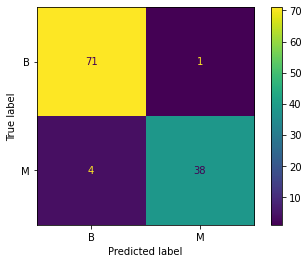

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


# ====================

[[284   1]
 [ 10 160]]


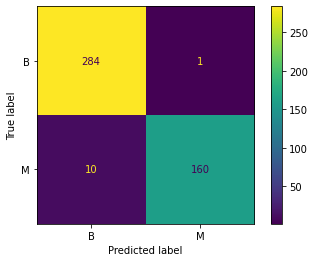

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       285
           M       0.99      0.94      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455



In [89]:
## Aqui com F1 otimizado

y_pred_test = grid_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = grid_knn.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

Voltando pro recall:

In [90]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits
[CV 1/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 3/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/76] END knn__metric=manhatt

[CV 3/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 4/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 5/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 6/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 7/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__w

[CV 4/10; 9/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 9/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 5/10; 9/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 9/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 6/10; 9/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 9/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 7/10; 9/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 9/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 8/10; 9/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 9/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__w

[CV 5/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 13/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 6/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 13/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 7/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 13/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 8/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 13/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 9/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 13/76] START knn__metric=manhattan, knn__n_neighbor

[CV 5/10; 17/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 6/10; 17/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform
[CV 6/10; 17/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 17/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform
[CV 7/10; 17/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 17/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform
[CV 8/10; 17/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 17/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform
[CV 9/10; 17/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 17/76] START knn__metric=manhattan, knn__n

[CV 2/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 3/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 4/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 5/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 6/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 6/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 23/76] START knn__metric=manhattan, knn__n_

[CV 9/10; 28/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 28/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance
[CV 10/10; 28/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 29/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 1/10; 29/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 29/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 2/10; 29/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 29/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 3/10; 29/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 29/76] START knn__metric=manhattan, kn

[CV 9/10; 32/76] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 32/76] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance
[CV 10/10; 32/76] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 33/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 1/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 33/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 2/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 33/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 3/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 33/76] START knn__metric=manhattan, kn

[CV 7/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 8/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 9/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 10/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 39/76] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 39/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 39/76] START knn__metric=euclidean, 

[CV 5/10; 44/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 6/10; 44/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 6/10; 44/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 7/10; 44/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 7/10; 44/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 44/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 8/10; 44/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 44/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 9/10; 44/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 10/10; 44/76] START knn__metric=euclidean, knn__n

[CV 5/10; 50/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 50/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance
[CV 6/10; 50/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 7/10; 50/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance
[CV 7/10; 50/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance;, score=0.706 total time=   0.0s
[CV 8/10; 50/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance
[CV 8/10; 50/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 50/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance
[CV 9/10; 50/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 50/76] START knn__metric=euclidean, knn__n

[CV 8/10; 54/76] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance
[CV 8/10; 54/76] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 54/76] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance
[CV 9/10; 54/76] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 54/76] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance
[CV 10/10; 54/76] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 55/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform
[CV 1/10; 55/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 55/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform
[CV 2/10; 55/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=unif

[CV 7/10; 60/76] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 60/76] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 8/10; 60/76] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 60/76] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 9/10; 60/76] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 60/76] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 10/10; 60/76] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 1/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 61/76] START knn__metric=euclidean

[CV 10/10; 64/76] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 1/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 2/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 3/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 4/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 65/76] START knn__metric=euclidean, knn__

[CV 3/10; 69/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 69/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform
[CV 4/10; 69/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 69/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform
[CV 5/10; 69/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 6/10; 69/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform
[CV 6/10; 69/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 69/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform
[CV 7/10; 69/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 69/76] START knn__metric=euclidean, knn__n_

[CV 6/10; 73/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 73/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform
[CV 7/10; 73/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 73/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform
[CV 8/10; 73/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 73/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform
[CV 9/10; 73/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 73/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform
[CV 10/10; 73/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 74/76] START knn__metric=euclidean, knn__

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

[[71  1]
 [ 3 39]]


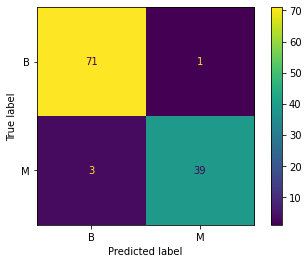

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


# ====================

[[285   0]
 [  7 163]]


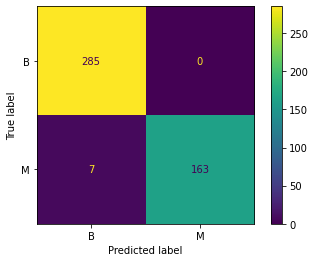

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       285
           M       1.00      0.96      0.98       170

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [91]:
## Comparando com a tentatia do início da aula percebemos uma pequena melhora na métrica em evidencia (recall)

y_pred_test = grid_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = grid_knn.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

## Exercício

2 - Vamos revisitar o exercício do insurance, agora nosso objetivo é utilizar o GridSearch para otimizar o número k de vizinhos, bem como qual dos tipos de weights e metrics para maximizar a acurácia.

#### Passo a passo

1 - Faça a leitura do dataset e escolha as features

2 - Efetue o train test split

3 - Defina as etapas do pipeline

4 - Instancie o pipeline

5 - Faça a divisão dos folds

6 - Defina as métricas que o GridSearch irá avaliar

7 - Instanciar o GridSearch

8 - Fazer o fit do GridSearch

9 - Avalie os resultados

In [92]:
df = pd.read_csv("insurance.csv")

df['target'] = np.where(df['charges'] < 10000, 0, np.where(df['charges'] < 30000, 1, 2))

df['flag_sex'] = np.where(df['sex'] == 'female', 1, 0)
df['is_smoker'] = np.where(df['smoker'] == 'yes', 1, 0)

X = df.drop(['charges', 'target', 'sex', 'smoker', 'region'], axis = 1)
y = df["target"]

In [96]:
X

,age,bmi,children,flag_sex,is_smoker
0,19,27.900,0,1,1
1,18,33.770,1,0,0
2,28,33.000,3,0,0
3,33,22.705,0,0,0
4,32,28.880,0,0,0
...,...,...,...,...,...
1333,50,30.970,3,0,0
1334,18,31.920,0,1,0
1335,18,36.850,0,1,0
1336,21,25.800,0,1,0


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean", "minkowski"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

Fitting 20 folds for each of 114 candidates, totalling 2280 fits
[CV 1/20; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/20; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.889 total time=   0.0s
[CV 2/20; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/20; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.870 total time=   0.0s
[CV 3/20; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/20; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.889 total time=   0.3s
[CV 4/20; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/20; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.870 total time=   0.0s
[CV 5/20; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/20; 1/114] END knn__me

[CV 7/20; 3/114] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform;, score=0.870 total time=   0.0s
[CV 8/20; 3/114] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform
[CV 8/20; 3/114] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform;, score=0.907 total time=   0.0s
[CV 9/20; 3/114] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform
[CV 9/20; 3/114] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform;, score=0.907 total time=   0.0s
[CV 10/20; 3/114] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform
[CV 10/20; 3/114] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform;, score=0.796 total time=   0.0s
[CV 11/20; 3/114] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform
[CV 11/20; 3/114] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform;, score=0.887 total time=   0.0s
[CV 12/20; 3/114] START knn__metric=manhattan, knn__n_neig

[CV 6/20; 6/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 7/20; 6/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance
[CV 7/20; 6/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 8/20; 6/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance
[CV 8/20; 6/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 9/20; 6/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance
[CV 9/20; 6/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 10/20; 6/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance
[CV 10/20; 6/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance;, score=0.796 total time=   0.0s
[CV 11/20; 6/114] START knn__metric=manhattan, knn_

[CV 8/20; 8/114] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 9/20; 8/114] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance
[CV 9/20; 8/114] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 10/20; 8/114] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance
[CV 10/20; 8/114] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance;, score=0.778 total time=   0.0s
[CV 11/20; 8/114] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance
[CV 11/20; 8/114] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 12/20; 8/114] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance
[CV 12/20; 8/114] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance;, score=0.811 total time=   0.0s
[CV 13/20; 8/114] START knn__metric=manhattan, 

[CV 8/20; 10/114] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 9/20; 10/114] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 9/20; 10/114] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.907 total time=   0.0s
[CV 10/20; 10/114] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 10/20; 10/114] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.815 total time=   0.0s
[CV 11/20; 10/114] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 11/20; 10/114] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.868 total time=   0.0s
[CV 12/20; 10/114] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 12/20; 10/114] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.830 total time=   0.0s
[CV 13/20; 10/114] START knn__metric=m

[CV 9/20; 12/114] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance;, score=0.907 total time=   0.0s
[CV 10/20; 12/114] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance
[CV 10/20; 12/114] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance;, score=0.796 total time=   0.0s
[CV 11/20; 12/114] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance
[CV 11/20; 12/114] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance;, score=0.868 total time=   0.0s
[CV 12/20; 12/114] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance
[CV 12/20; 12/114] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance;, score=0.830 total time=   0.0s
[CV 13/20; 12/114] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance
[CV 13/20; 12/114] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 14/20; 12/114] START knn__metric

[CV 10/20; 14/114] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=0.815 total time=   0.0s
[CV 11/20; 14/114] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 11/20; 14/114] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=0.868 total time=   0.0s
[CV 12/20; 14/114] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 12/20; 14/114] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=0.830 total time=   0.0s
[CV 13/20; 14/114] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 13/20; 14/114] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=0.906 total time=   0.0s
[CV 14/20; 14/114] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 14/20; 14/114] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=0.868 total time=   0.0s
[CV 15/20; 14/114] START knn__metri

[CV 15/20; 16/114] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 15/20; 16/114] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=0.943 total time=   0.0s
[CV 16/20; 16/114] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 16/20; 16/114] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=0.868 total time=   0.0s
[CV 17/20; 16/114] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 17/20; 16/114] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 18/20; 16/114] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 18/20; 16/114] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=0.925 total time=   0.0s
[CV 19/20; 16/114] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 19/20; 16/114] END knn__metric=manhattan, knn__n_neighbors=9, 

[CV 14/20; 19/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.868 total time=   0.0s
[CV 15/20; 19/114] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 15/20; 19/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.943 total time=   0.0s
[CV 16/20; 19/114] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 16/20; 19/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.887 total time=   0.0s
[CV 17/20; 19/114] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 17/20; 19/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.887 total time=   0.0s
[CV 18/20; 19/114] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 18/20; 19/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.962 total time=   0.0s
[CV 19/20; 19/114] START knn__metri

[CV 14/20; 22/114] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance;, score=0.868 total time=   0.0s
[CV 15/20; 22/114] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 15/20; 22/114] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance;, score=0.962 total time=   0.0s
[CV 16/20; 22/114] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 16/20; 22/114] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 17/20; 22/114] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 17/20; 22/114] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 18/20; 22/114] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 18/20; 22/114] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance;, score=0.943 total time=   0.0s
[CV 19/20; 22/114] START k

[CV 17/20; 24/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 18/20; 24/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 18/20; 24/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.943 total time=   0.0s
[CV 19/20; 24/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 19/20; 24/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.925 total time=   0.0s
[CV 20/20; 24/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 20/20; 24/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.943 total time=   0.0s
[CV 1/20; 25/114] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform
[CV 1/20; 25/114] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform;, score=0.833 total time=   0.0s
[CV 2/20; 25/114] START knn__m

[CV 18/20; 26/114] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=0.962 total time=   0.0s
[CV 19/20; 26/114] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 19/20; 26/114] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=0.925 total time=   0.0s
[CV 20/20; 26/114] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 20/20; 26/114] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=0.943 total time=   0.0s
[CV 1/20; 27/114] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 1/20; 27/114] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=0.833 total time=   0.0s
[CV 2/20; 27/114] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 2/20; 27/114] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=0.852 total time=   0.0s
[CV 3/20; 27/114] START knn__metri

[CV 19/20; 28/114] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=0.925 total time=   0.0s
[CV 20/20; 28/114] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance
[CV 20/20; 28/114] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=0.943 total time=   0.0s
[CV 1/20; 29/114] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 1/20; 29/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.833 total time=   0.0s
[CV 2/20; 29/114] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 2/20; 29/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.833 total time=   0.0s
[CV 3/20; 29/114] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 3/20; 29/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.889 total time=   0.0s
[CV 4/20; 29/114] START knn__metric=ma

[CV 18/20; 30/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance;, score=0.943 total time=   0.0s
[CV 19/20; 30/114] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 19/20; 30/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance;, score=0.925 total time=   0.0s
[CV 20/20; 30/114] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 20/20; 30/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance;, score=0.943 total time=   0.0s
[CV 1/20; 31/114] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform
[CV 1/20; 31/114] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=0.833 total time=   0.0s
[CV 2/20; 31/114] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform
[CV 2/20; 31/114] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=0.852 total time=   0.0s
[CV 3/20; 31/114] START knn__metri

[CV 18/20; 32/114] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance;, score=0.943 total time=   0.0s
[CV 19/20; 32/114] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance
[CV 19/20; 32/114] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance;, score=0.925 total time=   0.0s
[CV 20/20; 32/114] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance
[CV 20/20; 32/114] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance;, score=0.943 total time=   0.0s
[CV 1/20; 33/114] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 1/20; 33/114] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.852 total time=   0.0s
[CV 2/20; 33/114] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 2/20; 33/114] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.833 total time=   0.0s
[CV 3/20; 33/114] START knn__metri

[CV 20/20; 34/114] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=0.943 total time=   0.0s
[CV 1/20; 35/114] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform
[CV 1/20; 35/114] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform;, score=0.852 total time=   0.0s
[CV 2/20; 35/114] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform
[CV 2/20; 35/114] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform;, score=0.852 total time=   0.0s
[CV 3/20; 35/114] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform
[CV 3/20; 35/114] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform;, score=0.870 total time=   0.0s
[CV 4/20; 35/114] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform
[CV 4/20; 35/114] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform;, score=0.907 total time=   0.0s
[CV 5/20; 35/114] START knn__metric=manhat

[CV 18/20; 37/114] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform;, score=0.981 total time=   0.0s
[CV 19/20; 37/114] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform
[CV 19/20; 37/114] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform;, score=0.906 total time=   0.0s
[CV 20/20; 37/114] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform
[CV 20/20; 37/114] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform;, score=0.906 total time=   0.0s
[CV 1/20; 38/114] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 1/20; 38/114] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 2/20; 38/114] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 2/20; 38/114] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 3/20; 38/114] START knn__metric

[CV 20/20; 39/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=0.943 total time=   0.0s
[CV 1/20; 40/114] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance
[CV 1/20; 40/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=0.815 total time=   0.0s
[CV 2/20; 40/114] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance
[CV 2/20; 40/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 3/20; 40/114] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance
[CV 3/20; 40/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=0.796 total time=   0.0s
[CV 4/20; 40/114] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance
[CV 4/20; 40/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 5/20; 40/114] START knn__metric=euclidea

[CV 20/20; 41/114] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform;, score=0.906 total time=   0.0s
[CV 1/20; 42/114] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 1/20; 42/114] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=0.833 total time=   0.0s
[CV 2/20; 42/114] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 2/20; 42/114] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 3/20; 42/114] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 3/20; 42/114] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 4/20; 42/114] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 4/20; 42/114] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 5/20; 42/114] START knn__metric=euclidea

[CV 2/20; 44/114] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 3/20; 44/114] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 3/20; 44/114] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 4/20; 44/114] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 4/20; 44/114] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 5/20; 44/114] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 5/20; 44/114] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=0.833 total time=   0.0s
[CV 6/20; 44/114] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 6/20; 44/114] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 7/20; 44/114] START knn__metric=euclidea

[CV 4/20; 46/114] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 5/20; 46/114] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance
[CV 5/20; 46/114] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 6/20; 46/114] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance
[CV 6/20; 46/114] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 7/20; 46/114] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance
[CV 7/20; 46/114] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 8/20; 46/114] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance
[CV 8/20; 46/114] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance;, score=0.833 total time=   0.0s
[CV 9/20; 46/114] START knn__metric=euclidea

[CV 5/20; 48/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 6/20; 48/114] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 6/20; 48/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 7/20; 48/114] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 7/20; 48/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 8/20; 48/114] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 8/20; 48/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 9/20; 48/114] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 9/20; 48/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 10/20; 48/114] START knn__metric=euclide

[CV 6/20; 51/114] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.889 total time=   0.0s
[CV 7/20; 51/114] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 7/20; 51/114] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.907 total time=   0.0s
[CV 8/20; 51/114] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 8/20; 51/114] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.870 total time=   0.0s
[CV 9/20; 51/114] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 9/20; 51/114] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.889 total time=   0.0s
[CV 10/20; 51/114] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 10/20; 51/114] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.796 total time=   0.0s
[CV 11/20; 51/114] START knn__metric=euclidean, knn

[CV 6/20; 53/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=0.852 total time=   0.0s
[CV 7/20; 53/114] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 7/20; 53/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=0.889 total time=   0.0s
[CV 8/20; 53/114] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 8/20; 53/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=0.870 total time=   0.0s
[CV 9/20; 53/114] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 9/20; 53/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=0.907 total time=   0.0s
[CV 10/20; 53/114] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 10/20; 53/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=0.796 total time=   0.0s
[CV 11/20; 53/114] START knn__metric=euclidean, knn

[CV 6/20; 56/114] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 7/20; 56/114] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 7/20; 56/114] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.907 total time=   0.0s
[CV 8/20; 56/114] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 8/20; 56/114] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.833 total time=   0.0s
[CV 9/20; 56/114] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 9/20; 56/114] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.944 total time=   0.0s
[CV 10/20; 56/114] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 10/20; 56/114] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.796 total time=   0.0s
[CV 11/20; 56/114] START knn__met

[CV 8/20; 58/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.833 total time=   0.0s
[CV 9/20; 58/114] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 9/20; 58/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.963 total time=   0.0s
[CV 10/20; 58/114] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 10/20; 58/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.796 total time=   0.0s
[CV 11/20; 58/114] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 11/20; 58/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 12/20; 58/114] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 12/20; 58/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.830 total time=   0.0s
[CV 13/20; 58/114] START knn_

[CV 11/20; 60/114] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 12/20; 60/114] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 12/20; 60/114] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=0.830 total time=   0.0s
[CV 13/20; 60/114] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 13/20; 60/114] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=0.925 total time=   0.0s
[CV 14/20; 60/114] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 14/20; 60/114] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=0.868 total time=   0.0s
[CV 15/20; 60/114] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 15/20; 60/114] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=0.925 total time=   0.0s
[CV 16/20; 60/114] START k

[CV 9/20; 63/114] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=0.907 total time=   0.0s
[CV 10/20; 63/114] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 10/20; 63/114] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=0.778 total time=   0.0s
[CV 11/20; 63/114] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 11/20; 63/114] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=0.830 total time=   0.0s
[CV 12/20; 63/114] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 12/20; 63/114] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=0.830 total time=   0.0s
[CV 13/20; 63/114] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 13/20; 63/114] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=0.887 total time=   0.0s
[CV 14/20; 63/114] START knn__metric

[CV 6/20; 66/114] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 7/20; 66/114] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 7/20; 66/114] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=0.907 total time=   0.0s
[CV 8/20; 66/114] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 8/20; 66/114] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 9/20; 66/114] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 9/20; 66/114] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=0.944 total time=   0.0s
[CV 10/20; 66/114] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 10/20; 66/114] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=0.815 total time=   0.0s
[CV 11/20; 66/114] START knn__met

[CV 8/20; 68/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 9/20; 68/114] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=distance
[CV 9/20; 68/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=distance;, score=0.944 total time=   0.0s
[CV 10/20; 68/114] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=distance
[CV 10/20; 68/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=distance;, score=0.815 total time=   0.0s
[CV 11/20; 68/114] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=distance
[CV 11/20; 68/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 12/20; 68/114] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=distance
[CV 12/20; 68/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=distance;, score=0.849 total time=   0.0s
[CV 13/20; 68/114] START knn_

[CV 8/20; 70/114] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 9/20; 70/114] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 9/20; 70/114] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.926 total time=   0.0s
[CV 10/20; 70/114] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 10/20; 70/114] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.815 total time=   0.0s
[CV 11/20; 70/114] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 11/20; 70/114] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.868 total time=   0.0s
[CV 12/20; 70/114] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 12/20; 70/114] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.849 total time=   0.0s
[CV 13/20; 70/114] START knn_

[CV 9/20; 72/114] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance;, score=0.926 total time=   0.0s
[CV 10/20; 72/114] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance
[CV 10/20; 72/114] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance;, score=0.815 total time=   0.0s
[CV 11/20; 72/114] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance
[CV 11/20; 72/114] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 12/20; 72/114] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance
[CV 12/20; 72/114] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance;, score=0.849 total time=   0.0s
[CV 13/20; 72/114] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance
[CV 13/20; 72/114] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance;, score=0.925 total time=   0.0s
[CV 14/20; 72/114] START kn

[CV 8/20; 74/114] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 9/20; 74/114] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 9/20; 74/114] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=0.907 total time=   0.0s
[CV 10/20; 74/114] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 10/20; 74/114] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=0.815 total time=   0.0s
[CV 11/20; 74/114] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 11/20; 74/114] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 12/20; 74/114] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 12/20; 74/114] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=0.849 total time=   0.0s
[CV 13/20; 74/114] START knn_

[CV 8/20; 76/114] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=0.907 total time=   0.0s
[CV 9/20; 76/114] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 9/20; 76/114] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=0.926 total time=   0.0s
[CV 10/20; 76/114] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 10/20; 76/114] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=0.815 total time=   0.0s
[CV 11/20; 76/114] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 11/20; 76/114] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 12/20; 76/114] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 12/20; 76/114] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=0.849 total time=   0.0s
[CV 13/20; 76/114] START knn_

[CV 10/20; 78/114] END knn__metric=minkowski, knn__n_neighbors=2, knn__weights=distance;, score=0.741 total time=   0.0s
[CV 11/20; 78/114] START knn__metric=minkowski, knn__n_neighbors=2, knn__weights=distance
[CV 11/20; 78/114] END knn__metric=minkowski, knn__n_neighbors=2, knn__weights=distance;, score=0.868 total time=   0.0s
[CV 12/20; 78/114] START knn__metric=minkowski, knn__n_neighbors=2, knn__weights=distance
[CV 12/20; 78/114] END knn__metric=minkowski, knn__n_neighbors=2, knn__weights=distance;, score=0.811 total time=   0.0s
[CV 13/20; 78/114] START knn__metric=minkowski, knn__n_neighbors=2, knn__weights=distance
[CV 13/20; 78/114] END knn__metric=minkowski, knn__n_neighbors=2, knn__weights=distance;, score=0.849 total time=   0.0s
[CV 14/20; 78/114] START knn__metric=minkowski, knn__n_neighbors=2, knn__weights=distance
[CV 14/20; 78/114] END knn__metric=minkowski, knn__n_neighbors=2, knn__weights=distance;, score=0.792 total time=   0.0s
[CV 15/20; 78/114] START knn__metri

[CV 13/20; 80/114] END knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance;, score=0.849 total time=   0.0s
[CV 14/20; 80/114] START knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance
[CV 14/20; 80/114] END knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance;, score=0.830 total time=   0.0s
[CV 15/20; 80/114] START knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance
[CV 15/20; 80/114] END knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance;, score=0.906 total time=   0.0s
[CV 16/20; 80/114] START knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance
[CV 16/20; 80/114] END knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance;, score=0.849 total time=   0.0s
[CV 17/20; 80/114] START knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance
[CV 17/20; 80/114] END knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance;, score=0.849 total time=   0.0s
[CV 18/20; 80/114] START knn__metri

[CV 13/20; 82/114] END knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance;, score=0.868 total time=   0.0s
[CV 14/20; 82/114] START knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance
[CV 14/20; 82/114] END knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance;, score=0.849 total time=   0.0s
[CV 15/20; 82/114] START knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance
[CV 15/20; 82/114] END knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance;, score=0.925 total time=   0.0s
[CV 16/20; 82/114] START knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance
[CV 16/20; 82/114] END knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance;, score=0.868 total time=   0.0s
[CV 17/20; 82/114] START knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance
[CV 17/20; 82/114] END knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance;, score=0.868 total time=   0.0s
[CV 18/20; 82/114] START knn__metri

[CV 15/20; 84/114] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=distance;, score=0.925 total time=   0.0s
[CV 16/20; 84/114] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=distance
[CV 16/20; 84/114] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=distance;, score=0.849 total time=   0.0s
[CV 17/20; 84/114] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=distance
[CV 17/20; 84/114] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=distance;, score=0.868 total time=   0.0s
[CV 18/20; 84/114] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=distance
[CV 18/20; 84/114] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 19/20; 84/114] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=distance
[CV 19/20; 84/114] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=distance;, score=0.906 total time=   0.0s
[CV 20/20; 84/114] START knn__metri

[CV 18/20; 86/114] END knn__metric=minkowski, knn__n_neighbors=6, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 19/20; 86/114] START knn__metric=minkowski, knn__n_neighbors=6, knn__weights=distance
[CV 19/20; 86/114] END knn__metric=minkowski, knn__n_neighbors=6, knn__weights=distance;, score=0.925 total time=   0.0s
[CV 20/20; 86/114] START knn__metric=minkowski, knn__n_neighbors=6, knn__weights=distance
[CV 20/20; 86/114] END knn__metric=minkowski, knn__n_neighbors=6, knn__weights=distance;, score=0.906 total time=   0.0s
[CV 1/20; 87/114] START knn__metric=minkowski, knn__n_neighbors=7, knn__weights=uniform
[CV 1/20; 87/114] END knn__metric=minkowski, knn__n_neighbors=7, knn__weights=uniform;, score=0.852 total time=   0.0s
[CV 2/20; 87/114] START knn__metric=minkowski, knn__n_neighbors=7, knn__weights=uniform
[CV 2/20; 87/114] END knn__metric=minkowski, knn__n_neighbors=7, knn__weights=uniform;, score=0.852 total time=   0.0s
[CV 3/20; 87/114] START knn__metric=minkows

[CV 18/20; 88/114] END knn__metric=minkowski, knn__n_neighbors=7, knn__weights=distance;, score=0.906 total time=   0.0s
[CV 19/20; 88/114] START knn__metric=minkowski, knn__n_neighbors=7, knn__weights=distance
[CV 19/20; 88/114] END knn__metric=minkowski, knn__n_neighbors=7, knn__weights=distance;, score=0.906 total time=   0.0s
[CV 20/20; 88/114] START knn__metric=minkowski, knn__n_neighbors=7, knn__weights=distance
[CV 20/20; 88/114] END knn__metric=minkowski, knn__n_neighbors=7, knn__weights=distance;, score=0.925 total time=   0.0s
[CV 1/20; 89/114] START knn__metric=minkowski, knn__n_neighbors=8, knn__weights=uniform
[CV 1/20; 89/114] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=uniform;, score=0.852 total time=   0.0s
[CV 2/20; 89/114] START knn__metric=minkowski, knn__n_neighbors=8, knn__weights=uniform
[CV 2/20; 89/114] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=uniform;, score=0.852 total time=   0.0s
[CV 3/20; 89/114] START knn__metric=minkows

[CV 17/20; 91/114] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform
[CV 17/20; 91/114] END knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform;, score=0.887 total time=   0.0s
[CV 18/20; 91/114] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform
[CV 18/20; 91/114] END knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform;, score=0.943 total time=   0.0s
[CV 19/20; 91/114] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform
[CV 19/20; 91/114] END knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform;, score=0.887 total time=   0.0s
[CV 20/20; 91/114] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform
[CV 20/20; 91/114] END knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform;, score=0.906 total time=   0.0s
[CV 1/20; 92/114] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=distance
[CV 1/20; 92/114] END knn__metric=minkowski, knn__n_neighbors=9, knn__weigh

[CV 18/20; 93/114] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform;, score=0.962 total time=   0.0s
[CV 19/20; 93/114] START knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform
[CV 19/20; 93/114] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform;, score=0.906 total time=   0.0s
[CV 20/20; 93/114] START knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform
[CV 20/20; 93/114] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform;, score=0.925 total time=   0.0s
[CV 1/20; 94/114] START knn__metric=minkowski, knn__n_neighbors=10, knn__weights=distance
[CV 1/20; 94/114] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 2/20; 94/114] START knn__metric=minkowski, knn__n_neighbors=10, knn__weights=distance
[CV 2/20; 94/114] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 3/20; 94/114] START knn__metric

[CV 20/20; 95/114] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform;, score=0.925 total time=   0.0s
[CV 1/20; 96/114] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance
[CV 1/20; 96/114] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 2/20; 96/114] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance
[CV 2/20; 96/114] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 3/20; 96/114] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance
[CV 3/20; 96/114] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 4/20; 96/114] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance
[CV 4/20; 96/114] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 5/20; 96/114] START knn__metric

[CV 2/20; 98/114] END knn__metric=minkowski, knn__n_neighbors=12, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 3/20; 98/114] START knn__metric=minkowski, knn__n_neighbors=12, knn__weights=distance
[CV 3/20; 98/114] END knn__metric=minkowski, knn__n_neighbors=12, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 4/20; 98/114] START knn__metric=minkowski, knn__n_neighbors=12, knn__weights=distance
[CV 4/20; 98/114] END knn__metric=minkowski, knn__n_neighbors=12, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 5/20; 98/114] START knn__metric=minkowski, knn__n_neighbors=12, knn__weights=distance
[CV 5/20; 98/114] END knn__metric=minkowski, knn__n_neighbors=12, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 6/20; 98/114] START knn__metric=minkowski, knn__n_neighbors=12, knn__weights=distance
[CV 6/20; 98/114] END knn__metric=minkowski, knn__n_neighbors=12, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 7/20; 98/114] START knn__metric

[CV 1/20; 100/114] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 2/20; 100/114] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance
[CV 2/20; 100/114] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 3/20; 100/114] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance
[CV 3/20; 100/114] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 4/20; 100/114] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance
[CV 4/20; 100/114] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 5/20; 100/114] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance
[CV 5/20; 100/114] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 6/20; 100/114] START k

[CV 1/20; 102/114] END knn__metric=minkowski, knn__n_neighbors=14, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 2/20; 102/114] START knn__metric=minkowski, knn__n_neighbors=14, knn__weights=distance
[CV 2/20; 102/114] END knn__metric=minkowski, knn__n_neighbors=14, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 3/20; 102/114] START knn__metric=minkowski, knn__n_neighbors=14, knn__weights=distance
[CV 3/20; 102/114] END knn__metric=minkowski, knn__n_neighbors=14, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 4/20; 102/114] START knn__metric=minkowski, knn__n_neighbors=14, knn__weights=distance
[CV 4/20; 102/114] END knn__metric=minkowski, knn__n_neighbors=14, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 5/20; 102/114] START knn__metric=minkowski, knn__n_neighbors=14, knn__weights=distance
[CV 5/20; 102/114] END knn__metric=minkowski, knn__n_neighbors=14, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 6/20; 102/114] START k

[CV 2/20; 104/114] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 3/20; 104/114] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance
[CV 3/20; 104/114] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 4/20; 104/114] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance
[CV 4/20; 104/114] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 5/20; 104/114] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance
[CV 5/20; 104/114] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 6/20; 104/114] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance
[CV 6/20; 104/114] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 7/20; 104/114] START k

[CV 2/20; 106/114] END knn__metric=minkowski, knn__n_neighbors=16, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 3/20; 106/114] START knn__metric=minkowski, knn__n_neighbors=16, knn__weights=distance
[CV 3/20; 106/114] END knn__metric=minkowski, knn__n_neighbors=16, knn__weights=distance;, score=0.833 total time=   0.0s
[CV 4/20; 106/114] START knn__metric=minkowski, knn__n_neighbors=16, knn__weights=distance
[CV 4/20; 106/114] END knn__metric=minkowski, knn__n_neighbors=16, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 5/20; 106/114] START knn__metric=minkowski, knn__n_neighbors=16, knn__weights=distance
[CV 5/20; 106/114] END knn__metric=minkowski, knn__n_neighbors=16, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 6/20; 106/114] START knn__metric=minkowski, knn__n_neighbors=16, knn__weights=distance
[CV 6/20; 106/114] END knn__metric=minkowski, knn__n_neighbors=16, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 7/20; 106/114] START k

[CV 3/20; 108/114] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance;, score=0.852 total time=   0.0s
[CV 4/20; 108/114] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance
[CV 4/20; 108/114] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 5/20; 108/114] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance
[CV 5/20; 108/114] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 6/20; 108/114] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance
[CV 6/20; 108/114] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 7/20; 108/114] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance
[CV 7/20; 108/114] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance;, score=0.907 total time=   0.0s
[CV 8/20; 108/114] START k

[CV 7/20; 110/114] END knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance;, score=0.907 total time=   0.0s
[CV 8/20; 110/114] START knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance
[CV 8/20; 110/114] END knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance;, score=0.870 total time=   0.0s
[CV 9/20; 110/114] START knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance
[CV 9/20; 110/114] END knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance;, score=0.926 total time=   0.0s
[CV 10/20; 110/114] START knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance
[CV 10/20; 110/114] END knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance;, score=0.815 total time=   0.0s
[CV 11/20; 110/114] START knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance
[CV 11/20; 110/114] END knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 12/20; 110/114] ST

[CV 7/20; 112/114] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=distance;, score=0.907 total time=   0.0s
[CV 8/20; 112/114] START knn__metric=minkowski, knn__n_neighbors=19, knn__weights=distance
[CV 8/20; 112/114] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=distance;, score=0.889 total time=   0.0s
[CV 9/20; 112/114] START knn__metric=minkowski, knn__n_neighbors=19, knn__weights=distance
[CV 9/20; 112/114] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=distance;, score=0.907 total time=   0.0s
[CV 10/20; 112/114] START knn__metric=minkowski, knn__n_neighbors=19, knn__weights=distance
[CV 10/20; 112/114] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=distance;, score=0.815 total time=   0.0s
[CV 11/20; 112/114] START knn__metric=minkowski, knn__n_neighbors=19, knn__weights=distance
[CV 11/20; 112/114] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 12/20; 112/114] ST

[CV 9/20; 114/114] END knn__metric=minkowski, knn__n_neighbors=20, knn__weights=distance;, score=0.926 total time=   0.0s
[CV 10/20; 114/114] START knn__metric=minkowski, knn__n_neighbors=20, knn__weights=distance
[CV 10/20; 114/114] END knn__metric=minkowski, knn__n_neighbors=20, knn__weights=distance;, score=0.815 total time=   0.0s
[CV 11/20; 114/114] START knn__metric=minkowski, knn__n_neighbors=20, knn__weights=distance
[CV 11/20; 114/114] END knn__metric=minkowski, knn__n_neighbors=20, knn__weights=distance;, score=0.887 total time=   0.0s
[CV 12/20; 114/114] START knn__metric=minkowski, knn__n_neighbors=20, knn__weights=distance
[CV 12/20; 114/114] END knn__metric=minkowski, knn__n_neighbors=20, knn__weights=distance;, score=0.849 total time=   0.0s
[CV 13/20; 114/114] START knn__metric=minkowski, knn__n_neighbors=20, knn__weights=distance
[CV 13/20; 114/114] END knn__metric=minkowski, knn__n_neighbors=20, knn__weights=distance;, score=0.925 total time=   0.0s
[CV 14/20; 114/114

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'minkowski'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(accuracy_score), verbose=10)

In [103]:
grid_knn.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=12))])

[[137   6   0]
 [ 21  71   1]
 [  1   3  28]]


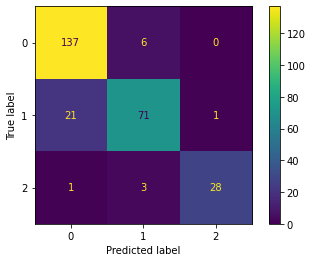

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       143
           1       0.89      0.76      0.82        93
           2       0.97      0.88      0.92        32

    accuracy                           0.88       268
   macro avg       0.90      0.87      0.88       268
weighted avg       0.88      0.88      0.88       268


# ====================

[[556  13   0]
 [ 64 304   3]
 [  2  14 114]]


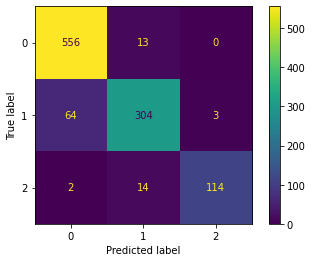

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       569
           1       0.92      0.82      0.87       371
           2       0.97      0.88      0.92       130

    accuracy                           0.91      1070
   macro avg       0.93      0.89      0.91      1070
weighted avg       0.91      0.91      0.91      1070



In [102]:
## Resultado ficou bastante semelhante, melhorando em 1 único caso.
## Algumas hipóteses do motivo: 1 - condições não identicas as da estimativa anterior (quando estava pior antes da
## adição da distância de minkowski)
## 2 - Azar na divisão dos folds, este podemos validar variando o numero de folds ou o shuffle (mude o random_state)

y_pred_test = grid_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = grid_knn.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

____
____
____

## 3) KNN para regressão

O KNN é nosso primeiro exemplo de algoritmo que pode ser utilizado para ambos os problemas de classificação e regressão!

A ideia é bem simples: o target atribuído a uma nova observação é igual à **média do target das $k$ observações mais próximas**

<img src="https://bookdown.org/f100441618/bookdown-regresion/www/KNN.jpg" width=500>

Naturalmente, também para regressão o parâmetro $k$ e a métrica de distância são hiperparâmetros importantes:

<img src="https://i.stack.imgur.com/gAILq.png" width=500>

A classe no sklearn é a [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). Dê uma olhada no User Guide e também no [RadiusNeighborsRegressor!](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor)

In [104]:
from sklearn.neighbors import KNeighborsRegressor

In [105]:
df_houses = pd.read_csv("house_prices.csv")
df_houses = df_houses.select_dtypes(include=np.number).dropna()

X = df_houses.drop(columns=["Id", "SalePrice"])
y = df_houses["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [119]:
## Retirando features com menos de 20% de correlação com o target

columns = df_houses.corr()['SalePrice'].abs() < 0.2


X = df_houses.drop(columns=list(columns[columns==True].index), axis = 1)
y = df_houses['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [121]:
X

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,2,1,8,0,2003.0,2,548,0,61,208500
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,2,0,6,1,1976.0,2,460,298,0,181500
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,2,1,6,1,2001.0,2,608,0,42,223500
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,1,0,7,1,1998.0,3,642,0,35,140000
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,2,1,9,1,2000.0,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,2,1,7,1,1999.0,2,460,0,40,175000
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,2,0,7,2,1978.0,2,500,349,0,210000
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,2,0,9,2,1941.0,1,252,0,60,266500
1458,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,...,1,0,5,0,1950.0,1,240,366,0,142125


In [122]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsRegressor())]

pipe = Pipeline(lista_etapas)

# ====================

# aqui, kfold normal pq nao tem classe pra estratificar
splitter = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = "neg_mean_absolute_error"

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean", "mitkowski"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn_reg = GridSearchCV(estimator=pipe, 
                            param_grid=param_grid,
                            scoring=metrica,
                            cv=splitter,
                            verbose=10)

grid_knn_reg.fit(X_train, y_train)

Fitting 10 folds for each of 114 candidates, totalling 1140 fits
[CV 1/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=-21791.611 total time=   0.0s
[CV 2/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=-20082.861 total time=   0.0s
[CV 3/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=-21889.944 total time=   0.0s
[CV 4/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=-24263.644 total time=   0.0s
[CV 5/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10

[CV 3/10; 5/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-18549.164 total time=   0.0s
[CV 4/10; 5/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 4/10; 5/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-21208.783 total time=   0.0s
[CV 5/10; 5/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 5/10; 5/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-17012.775 total time=   0.0s
[CV 6/10; 5/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 6/10; 5/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-15204.222 total time=   0.0s
[CV 7/10; 5/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 7/10; 5/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-15543.697 total time=   0.0s
[CV 8/10; 5/114] START knn__metric=ma

[CV 10/10; 10/114] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=-18976.829 total time=   0.0s
[CV 1/10; 11/114] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 1/10; 11/114] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=-19858.459 total time=   0.0s
[CV 2/10; 11/114] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 2/10; 11/114] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=-19026.214 total time=   0.0s
[CV 3/10; 11/114] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 3/10; 11/114] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=-18588.854 total time=   0.0s
[CV 4/10; 11/114] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 4/10; 11/114] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=-20106.279 total time=   0.0s
[CV 5/10; 11/114] START kn

[CV 9/10; 15/114] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=-21018.462 total time=   0.0s
[CV 10/10; 15/114] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 10/10; 15/114] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=-18263.881 total time=   0.0s
[CV 1/10; 16/114] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 1/10; 16/114] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=-18875.602 total time=   0.0s
[CV 2/10; 16/114] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 2/10; 16/114] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=-18454.471 total time=   0.0s
[CV 3/10; 16/114] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance
[CV 3/10; 16/114] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance;, score=-18496.108 total time=   0.0s
[CV 4/10; 16/114] ST

[CV 2/10; 20/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=-18947.719 total time=   0.0s
[CV 3/10; 20/114] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 3/10; 20/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=-18681.723 total time=   0.0s
[CV 4/10; 20/114] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 4/10; 20/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=-20233.224 total time=   0.0s
[CV 5/10; 20/114] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 5/10; 20/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=-16123.048 total time=   0.0s
[CV 6/10; 20/114] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 6/10; 20/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=-13295.723 total time=   0.0s
[CV 7/10; 

[CV 2/10; 24/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=-19095.151 total time=   0.0s
[CV 3/10; 24/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 3/10; 24/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=-18689.817 total time=   0.0s
[CV 4/10; 24/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 4/10; 24/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=-19975.178 total time=   0.0s
[CV 5/10; 24/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 5/10; 24/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=-16169.033 total time=   0.0s
[CV 6/10; 24/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 6/10; 24/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=-13608.617 total time=   0.0s
[CV 7/10; 

[CV 7/10; 29/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=-18451.707 total time=   0.0s
[CV 8/10; 29/114] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 8/10; 29/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=-20063.372 total time=   0.0s
[CV 9/10; 29/114] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 9/10; 29/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=-20976.423 total time=   0.0s
[CV 10/10; 29/114] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 10/10; 29/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=-18903.574 total time=   0.0s
[CV 1/10; 30/114] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 1/10; 30/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance;, score=-19213.751 total time=   0.0s
[CV 2/10; 30/11

[CV 6/10; 33/114] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=-14432.500 total time=   0.0s
[CV 7/10; 33/114] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 7/10; 33/114] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=-18747.383 total time=   0.0s
[CV 8/10; 33/114] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 8/10; 33/114] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=-20608.225 total time=   0.0s
[CV 9/10; 33/114] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 9/10; 33/114] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=-21501.007 total time=   0.0s
[CV 10/10; 33/114] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 10/10; 33/114] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=-18743.074 total time=   0.0s
[CV 1/10; 34/114]

[CV 1/10; 39/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=-20826.939 total time=   0.0s
[CV 2/10; 39/114] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 39/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=-21925.622 total time=   0.0s
[CV 3/10; 39/114] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 39/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=-22303.556 total time=   0.0s
[CV 4/10; 39/114] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 39/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=-24102.989 total time=   0.0s
[CV 5/10; 39/114] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 39/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=-15393.550 total time=   0.0s
[CV 6/10; 39/114] START knn_

[CV 5/10; 43/114] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 5/10; 43/114] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=-16731.881 total time=   0.0s
[CV 6/10; 43/114] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 6/10; 43/114] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=-16389.347 total time=   0.0s
[CV 7/10; 43/114] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 7/10; 43/114] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=-18680.371 total time=   0.0s
[CV 8/10; 43/114] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 8/10; 43/114] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=-18022.952 total time=   0.0s
[CV 9/10; 43/114] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 9/10; 43/114] END knn__metric=euclidean, knn__n_neighbors=4,

[CV 4/10; 47/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=-21453.439 total time=   0.0s
[CV 5/10; 47/114] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 5/10; 47/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=-16702.569 total time=   0.0s
[CV 6/10; 47/114] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 6/10; 47/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=-16296.739 total time=   0.0s
[CV 7/10; 47/114] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 7/10; 47/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=-17947.768 total time=   0.0s
[CV 8/10; 47/114] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 8/10; 47/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=-18008.058 total time=   0.0s
[CV 9/10; 47/114] START knn_

[CV 8/10; 51/114] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=-18658.681 total time=   0.0s
[CV 9/10; 51/114] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 9/10; 51/114] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=-21457.468 total time=   0.0s
[CV 10/10; 51/114] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 10/10; 51/114] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=-19977.100 total time=   0.0s
[CV 1/10; 52/114] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 1/10; 52/114] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=-19534.291 total time=   0.0s
[CV 2/10; 52/114] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 2/10; 52/114] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=-19340.511 total time=   0.0s
[CV 3/10; 52/114] STAR

[CV 10/10; 55/114] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform;, score=-20008.173 total time=   0.0s
[CV 1/10; 56/114] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 1/10; 56/114] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=-19254.670 total time=   0.0s
[CV 2/10; 56/114] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 2/10; 56/114] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=-19755.048 total time=   0.0s
[CV 3/10; 56/114] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 3/10; 56/114] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=-19124.919 total time=   0.0s
[CV 4/10; 56/114] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 4/10; 56/114] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=-22170.452 total time=   0.0s
[CV 5/10; 

[CV 6/10; 60/114] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=-15447.937 total time=   0.0s
[CV 7/10; 60/114] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 7/10; 60/114] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=-18521.320 total time=   0.0s
[CV 8/10; 60/114] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 8/10; 60/114] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=-19262.859 total time=   0.0s
[CV 9/10; 60/114] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 9/10; 60/114] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=-21974.496 total time=   0.0s
[CV 10/10; 60/114] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 10/10; 60/114] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=-19491.007 total time=   0.0s
[CV 1/10

[CV 10/10; 64/114] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=distance;, score=-19758.065 total time=   0.0s
[CV 1/10; 65/114] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 1/10; 65/114] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=-20382.733 total time=   0.0s
[CV 2/10; 65/114] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 2/10; 65/114] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=-20645.453 total time=   0.0s
[CV 3/10; 65/114] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 3/10; 65/114] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=-19801.352 total time=   0.0s
[CV 4/10; 65/114] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 4/10; 65/114] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=-23424.642 total time=   0.0s
[CV 5/10; 65/114]

[CV 5/10; 69/114] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform;, score=-17293.850 total time=   0.0s
[CV 6/10; 69/114] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform
[CV 6/10; 69/114] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform;, score=-15566.456 total time=   0.0s
[CV 7/10; 69/114] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform
[CV 7/10; 69/114] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform;, score=-19578.149 total time=   0.0s
[CV 8/10; 69/114] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform
[CV 8/10; 69/114] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform;, score=-21133.820 total time=   0.0s
[CV 9/10; 69/114] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform
[CV 9/10; 69/114] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform;, score=-22733.741 total time=   0.0s
[CV 10/10; 69/114] 

[CV 9/10; 73/114] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform;, score=-22918.817 total time=   0.0s
[CV 10/10; 73/114] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform
[CV 10/10; 73/114] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform;, score=-20968.045 total time=   0.0s
[CV 1/10; 74/114] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 1/10; 74/114] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=-19646.541 total time=   0.0s
[CV 2/10; 74/114] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 2/10; 74/114] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=-21159.696 total time=   0.0s
[CV 3/10; 74/114] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 3/10; 74/114] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=-20527.485 total time=   0.0s
[CV 4/10; 7

[CV 8/10; 78/114] END knn__metric=mitkowski, knn__n_neighbors=2, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 78/114] START knn__metric=mitkowski, knn__n_neighbors=2, knn__weights=distance
[CV 9/10; 78/114] END knn__metric=mitkowski, knn__n_neighbors=2, knn__weights=distance;, score=nan total time=   0.0s
[CV 10/10; 78/114] START knn__metric=mitkowski, knn__n_neighbors=2, knn__weights=distance
[CV 10/10; 78/114] END knn__metric=mitkowski, knn__n_neighbors=2, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 79/114] START knn__metric=mitkowski, knn__n_neighbors=3, knn__weights=uniform
[CV 1/10; 79/114] END knn__metric=mitkowski, knn__n_neighbors=3, knn__weights=uniform;, score=nan total time=   0.0s
[CV 2/10; 79/114] START knn__metric=mitkowski, knn__n_neighbors=3, knn__weights=uniform
[CV 2/10; 79/114] END knn__metric=mitkowski, knn__n_neighbors=3, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 79/114] START knn__metric=mitkowski, knn__n_ne

[CV 3/10; 85/114] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 85/114] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=uniform
[CV 4/10; 85/114] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 85/114] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=uniform
[CV 5/10; 85/114] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=uniform;, score=nan total time=   0.0s
[CV 6/10; 85/114] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=uniform
[CV 6/10; 85/114] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=uniform;, score=nan total time=   0.0s
[CV 7/10; 85/114] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=uniform
[CV 7/10; 85/114] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=uniform;, score=nan total time=   0.0s
[CV 8/10; 85/114] START knn__metric=mitkowski, knn__n_neighbors

[CV 2/10; 92/114] END knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 92/114] START knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=distance
[CV 3/10; 92/114] END knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 92/114] START knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=distance
[CV 4/10; 92/114] END knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 92/114] START knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=distance
[CV 5/10; 92/114] END knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 92/114] START knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=distance
[CV 6/10; 92/114] END knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 92/114] START knn__metric=mitkowski, knn__n_

[CV 10/10; 98/114] END knn__metric=mitkowski, knn__n_neighbors=12, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 99/114] START knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=uniform
[CV 1/10; 99/114] END knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=uniform;, score=nan total time=   0.0s
[CV 2/10; 99/114] START knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=uniform
[CV 2/10; 99/114] END knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 99/114] START knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=uniform
[CV 3/10; 99/114] END knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 99/114] START knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=uniform
[CV 4/10; 99/114] END knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 99/114] START knn__metric=mitkowski, knn__

[CV 6/10; 105/114] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform;, score=nan total time=   0.0s
[CV 7/10; 105/114] START knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform
[CV 7/10; 105/114] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform;, score=nan total time=   0.0s
[CV 8/10; 105/114] START knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform
[CV 8/10; 105/114] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform;, score=nan total time=   0.0s
[CV 9/10; 105/114] START knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform
[CV 9/10; 105/114] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform;, score=nan total time=   0.0s
[CV 10/10; 105/114] START knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform
[CV 10/10; 105/114] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 106/114] START knn__metric=mitkow

[CV 10/10; 111/114] END knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 112/114] START knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance
[CV 1/10; 112/114] END knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 112/114] START knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance
[CV 2/10; 112/114] END knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 112/114] START knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance
[CV 3/10; 112/114] END knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 112/114] START knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance
[CV 4/10; 112/114] END knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 112/114] START knn__metric

C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
380 fits failed out of a total of 1140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
380 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_regre

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'mitkowski'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=10)

In [123]:
grid_knn_reg.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'distance'}

In [124]:
grid_knn_reg.best_score_

-17579.562391709467

In [125]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = grid_knn_reg.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = grid_knn_reg.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: 0.89
MAE: 16881.03
RMSE: 29989.56


In [111]:
df_houses

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


Limitando o k, pra fugir de overfitting

In [126]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsRegressor())]

pipe = Pipeline(lista_etapas)

# ====================

# aqui, kfold normal pq nao tem classe pra estratificar
splitter = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = "neg_mean_absolute_error"

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(50, 100)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn_reg = GridSearchCV(estimator=pipe, 
                            param_grid=param_grid,
                            scoring=metrica,
                            cv=splitter,
                            verbose=10)

grid_knn_reg.fit(X_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV 1/10; 1/200] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform
[CV 1/10; 1/200] END knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform;, score=-19303.317 total time=   0.0s
[CV 2/10; 1/200] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform
[CV 2/10; 1/200] END knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform;, score=-21976.169 total time=   0.0s
[CV 3/10; 1/200] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform
[CV 3/10; 1/200] END knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform;, score=-21681.789 total time=   0.0s
[CV 4/10; 1/200] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform
[CV 4/10; 1/200] END knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform;, score=-23234.419 total time=   0.0s
[CV 5/10; 1/200] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform

[CV 9/10; 6/200] END knn__metric=manhattan, knn__n_neighbors=52, knn__weights=distance;, score=-21171.165 total time=   0.0s
[CV 10/10; 6/200] START knn__metric=manhattan, knn__n_neighbors=52, knn__weights=distance
[CV 10/10; 6/200] END knn__metric=manhattan, knn__n_neighbors=52, knn__weights=distance;, score=-19792.571 total time=   0.0s
[CV 1/10; 7/200] START knn__metric=manhattan, knn__n_neighbors=53, knn__weights=uniform
[CV 1/10; 7/200] END knn__metric=manhattan, knn__n_neighbors=53, knn__weights=uniform;, score=-19382.453 total time=   0.0s
[CV 2/10; 7/200] START knn__metric=manhattan, knn__n_neighbors=53, knn__weights=uniform
[CV 2/10; 7/200] END knn__metric=manhattan, knn__n_neighbors=53, knn__weights=uniform;, score=-22480.332 total time=   0.0s
[CV 3/10; 7/200] START knn__metric=manhattan, knn__n_neighbors=53, knn__weights=uniform
[CV 3/10; 7/200] END knn__metric=manhattan, knn__n_neighbors=53, knn__weights=uniform;, score=-21897.361 total time=   0.0s
[CV 4/10; 7/200] START 

[CV 3/10; 11/200] END knn__metric=manhattan, knn__n_neighbors=55, knn__weights=uniform;, score=-21967.304 total time=   0.0s
[CV 4/10; 11/200] START knn__metric=manhattan, knn__n_neighbors=55, knn__weights=uniform
[CV 4/10; 11/200] END knn__metric=manhattan, knn__n_neighbors=55, knn__weights=uniform;, score=-23610.771 total time=   0.0s
[CV 5/10; 11/200] START knn__metric=manhattan, knn__n_neighbors=55, knn__weights=uniform
[CV 5/10; 11/200] END knn__metric=manhattan, knn__n_neighbors=55, knn__weights=uniform;, score=-19226.665 total time=   0.0s
[CV 6/10; 11/200] START knn__metric=manhattan, knn__n_neighbors=55, knn__weights=uniform
[CV 6/10; 11/200] END knn__metric=manhattan, knn__n_neighbors=55, knn__weights=uniform;, score=-15356.921 total time=   0.0s
[CV 7/10; 11/200] START knn__metric=manhattan, knn__n_neighbors=55, knn__weights=uniform
[CV 7/10; 11/200] END knn__metric=manhattan, knn__n_neighbors=55, knn__weights=uniform;, score=-20835.871 total time=   0.0s
[CV 8/10; 11/200] S

[CV 3/10; 15/200] END knn__metric=manhattan, knn__n_neighbors=57, knn__weights=uniform;, score=-22102.554 total time=   0.0s
[CV 4/10; 15/200] START knn__metric=manhattan, knn__n_neighbors=57, knn__weights=uniform
[CV 4/10; 15/200] END knn__metric=manhattan, knn__n_neighbors=57, knn__weights=uniform;, score=-23717.877 total time=   0.0s
[CV 5/10; 15/200] START knn__metric=manhattan, knn__n_neighbors=57, knn__weights=uniform
[CV 5/10; 15/200] END knn__metric=manhattan, knn__n_neighbors=57, knn__weights=uniform;, score=-19251.130 total time=   0.0s
[CV 6/10; 15/200] START knn__metric=manhattan, knn__n_neighbors=57, knn__weights=uniform
[CV 6/10; 15/200] END knn__metric=manhattan, knn__n_neighbors=57, knn__weights=uniform;, score=-15448.165 total time=   0.0s
[CV 7/10; 15/200] START knn__metric=manhattan, knn__n_neighbors=57, knn__weights=uniform
[CV 7/10; 15/200] END knn__metric=manhattan, knn__n_neighbors=57, knn__weights=uniform;, score=-20994.424 total time=   0.0s
[CV 8/10; 15/200] S

[CV 5/10; 19/200] END knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform;, score=-19405.280 total time=   0.0s
[CV 6/10; 19/200] START knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform
[CV 6/10; 19/200] END knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform;, score=-15451.613 total time=   0.0s
[CV 7/10; 19/200] START knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform
[CV 7/10; 19/200] END knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform;, score=-20962.016 total time=   0.0s
[CV 8/10; 19/200] START knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform
[CV 8/10; 19/200] END knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform;, score=-22771.768 total time=   0.0s
[CV 9/10; 19/200] START knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform
[CV 9/10; 19/200] END knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform;, score=-21969.568 total time=   0.0s
[CV 10/10; 19/200] 

[CV 8/10; 23/200] END knn__metric=manhattan, knn__n_neighbors=61, knn__weights=uniform;, score=-22817.884 total time=   0.0s
[CV 9/10; 23/200] START knn__metric=manhattan, knn__n_neighbors=61, knn__weights=uniform
[CV 9/10; 23/200] END knn__metric=manhattan, knn__n_neighbors=61, knn__weights=uniform;, score=-22179.634 total time=   0.0s
[CV 10/10; 23/200] START knn__metric=manhattan, knn__n_neighbors=61, knn__weights=uniform
[CV 10/10; 23/200] END knn__metric=manhattan, knn__n_neighbors=61, knn__weights=uniform;, score=-20797.950 total time=   0.0s
[CV 1/10; 24/200] START knn__metric=manhattan, knn__n_neighbors=61, knn__weights=distance
[CV 1/10; 24/200] END knn__metric=manhattan, knn__n_neighbors=61, knn__weights=distance;, score=-19015.271 total time=   0.0s
[CV 2/10; 24/200] START knn__metric=manhattan, knn__n_neighbors=61, knn__weights=distance
[CV 2/10; 24/200] END knn__metric=manhattan, knn__n_neighbors=61, knn__weights=distance;, score=-22031.042 total time=   0.0s
[CV 3/10; 24/

[CV 2/10; 29/200] END knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform;, score=-22887.598 total time=   0.0s
[CV 3/10; 29/200] START knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform
[CV 3/10; 29/200] END knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform;, score=-22805.528 total time=   0.0s
[CV 4/10; 29/200] START knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform
[CV 4/10; 29/200] END knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform;, score=-23951.978 total time=   0.0s
[CV 5/10; 29/200] START knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform
[CV 5/10; 29/200] END knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform;, score=-19394.503 total time=   0.0s
[CV 6/10; 29/200] START knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform
[CV 6/10; 29/200] END knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform;, score=-15548.870 total time=   0.0s
[CV 7/10; 29/200] S

[CV 2/10; 33/200] END knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform;, score=-23053.486 total time=   0.0s
[CV 3/10; 33/200] START knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform
[CV 3/10; 33/200] END knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform;, score=-22928.078 total time=   0.0s
[CV 4/10; 33/200] START knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform
[CV 4/10; 33/200] END knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform;, score=-24164.496 total time=   0.0s
[CV 5/10; 33/200] START knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform
[CV 5/10; 33/200] END knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform;, score=-19471.400 total time=   0.0s
[CV 6/10; 33/200] START knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform
[CV 6/10; 33/200] END knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform;, score=-15520.971 total time=   0.0s
[CV 7/10; 33/200] S

[CV 7/10; 38/200] END knn__metric=manhattan, knn__n_neighbors=68, knn__weights=distance;, score=-20648.008 total time=   0.0s
[CV 8/10; 38/200] START knn__metric=manhattan, knn__n_neighbors=68, knn__weights=distance
[CV 8/10; 38/200] END knn__metric=manhattan, knn__n_neighbors=68, knn__weights=distance;, score=-21894.424 total time=   0.0s
[CV 9/10; 38/200] START knn__metric=manhattan, knn__n_neighbors=68, knn__weights=distance
[CV 9/10; 38/200] END knn__metric=manhattan, knn__n_neighbors=68, knn__weights=distance;, score=-21798.111 total time=   0.0s
[CV 10/10; 38/200] START knn__metric=manhattan, knn__n_neighbors=68, knn__weights=distance
[CV 10/10; 38/200] END knn__metric=manhattan, knn__n_neighbors=68, knn__weights=distance;, score=-20166.470 total time=   0.0s
[CV 1/10; 39/200] START knn__metric=manhattan, knn__n_neighbors=69, knn__weights=uniform
[CV 1/10; 39/200] END knn__metric=manhattan, knn__n_neighbors=69, knn__weights=uniform;, score=-20411.802 total time=   0.0s
[CV 2/10; 

[CV 1/10; 44/200] END knn__metric=manhattan, knn__n_neighbors=71, knn__weights=distance;, score=-19689.592 total time=   0.0s
[CV 2/10; 44/200] START knn__metric=manhattan, knn__n_neighbors=71, knn__weights=distance
[CV 2/10; 44/200] END knn__metric=manhattan, knn__n_neighbors=71, knn__weights=distance;, score=-22639.496 total time=   0.0s
[CV 3/10; 44/200] START knn__metric=manhattan, knn__n_neighbors=71, knn__weights=distance
[CV 3/10; 44/200] END knn__metric=manhattan, knn__n_neighbors=71, knn__weights=distance;, score=-22403.215 total time=   0.0s
[CV 4/10; 44/200] START knn__metric=manhattan, knn__n_neighbors=71, knn__weights=distance
[CV 4/10; 44/200] END knn__metric=manhattan, knn__n_neighbors=71, knn__weights=distance;, score=-23516.865 total time=   0.0s
[CV 5/10; 44/200] START knn__metric=manhattan, knn__n_neighbors=71, knn__weights=distance
[CV 5/10; 44/200] END knn__metric=manhattan, knn__n_neighbors=71, knn__weights=distance;, score=-18915.893 total time=   0.0s
[CV 6/10; 

[CV 1/10; 48/200] END knn__metric=manhattan, knn__n_neighbors=73, knn__weights=distance;, score=-19781.332 total time=   0.0s
[CV 2/10; 48/200] START knn__metric=manhattan, knn__n_neighbors=73, knn__weights=distance
[CV 2/10; 48/200] END knn__metric=manhattan, knn__n_neighbors=73, knn__weights=distance;, score=-22818.053 total time=   0.0s
[CV 3/10; 48/200] START knn__metric=manhattan, knn__n_neighbors=73, knn__weights=distance
[CV 3/10; 48/200] END knn__metric=manhattan, knn__n_neighbors=73, knn__weights=distance;, score=-22479.184 total time=   0.0s
[CV 4/10; 48/200] START knn__metric=manhattan, knn__n_neighbors=73, knn__weights=distance
[CV 4/10; 48/200] END knn__metric=manhattan, knn__n_neighbors=73, knn__weights=distance;, score=-23498.730 total time=   0.0s
[CV 5/10; 48/200] START knn__metric=manhattan, knn__n_neighbors=73, knn__weights=distance
[CV 5/10; 48/200] END knn__metric=manhattan, knn__n_neighbors=73, knn__weights=distance;, score=-18977.622 total time=   0.0s
[CV 6/10; 

[CV 2/10; 52/200] END knn__metric=manhattan, knn__n_neighbors=75, knn__weights=distance;, score=-22955.145 total time=   0.0s
[CV 3/10; 52/200] START knn__metric=manhattan, knn__n_neighbors=75, knn__weights=distance
[CV 3/10; 52/200] END knn__metric=manhattan, knn__n_neighbors=75, knn__weights=distance;, score=-22573.645 total time=   0.0s
[CV 4/10; 52/200] START knn__metric=manhattan, knn__n_neighbors=75, knn__weights=distance
[CV 4/10; 52/200] END knn__metric=manhattan, knn__n_neighbors=75, knn__weights=distance;, score=-23586.745 total time=   0.0s
[CV 5/10; 52/200] START knn__metric=manhattan, knn__n_neighbors=75, knn__weights=distance
[CV 5/10; 52/200] END knn__metric=manhattan, knn__n_neighbors=75, knn__weights=distance;, score=-19076.424 total time=   0.0s
[CV 6/10; 52/200] START knn__metric=manhattan, knn__n_neighbors=75, knn__weights=distance
[CV 6/10; 52/200] END knn__metric=manhattan, knn__n_neighbors=75, knn__weights=distance;, score=-14488.966 total time=   0.0s
[CV 7/10; 

[CV 5/10; 56/200] END knn__metric=manhattan, knn__n_neighbors=77, knn__weights=distance;, score=-19116.115 total time=   0.0s
[CV 6/10; 56/200] START knn__metric=manhattan, knn__n_neighbors=77, knn__weights=distance
[CV 6/10; 56/200] END knn__metric=manhattan, knn__n_neighbors=77, knn__weights=distance;, score=-14486.508 total time=   0.0s
[CV 7/10; 56/200] START knn__metric=manhattan, knn__n_neighbors=77, knn__weights=distance
[CV 7/10; 56/200] END knn__metric=manhattan, knn__n_neighbors=77, knn__weights=distance;, score=-20825.685 total time=   0.0s
[CV 8/10; 56/200] START knn__metric=manhattan, knn__n_neighbors=77, knn__weights=distance
[CV 8/10; 56/200] END knn__metric=manhattan, knn__n_neighbors=77, knn__weights=distance;, score=-22047.907 total time=   0.0s
[CV 9/10; 56/200] START knn__metric=manhattan, knn__n_neighbors=77, knn__weights=distance
[CV 9/10; 56/200] END knn__metric=manhattan, knn__n_neighbors=77, knn__weights=distance;, score=-22205.338 total time=   0.0s
[CV 10/10;

[CV 7/10; 61/200] END knn__metric=manhattan, knn__n_neighbors=80, knn__weights=uniform;, score=-21898.359 total time=   0.0s
[CV 8/10; 61/200] START knn__metric=manhattan, knn__n_neighbors=80, knn__weights=uniform
[CV 8/10; 61/200] END knn__metric=manhattan, knn__n_neighbors=80, knn__weights=uniform;, score=-23284.303 total time=   0.0s
[CV 9/10; 61/200] START knn__metric=manhattan, knn__n_neighbors=80, knn__weights=uniform
[CV 9/10; 61/200] END knn__metric=manhattan, knn__n_neighbors=80, knn__weights=uniform;, score=-22977.080 total time=   0.0s
[CV 10/10; 61/200] START knn__metric=manhattan, knn__n_neighbors=80, knn__weights=uniform
[CV 10/10; 61/200] END knn__metric=manhattan, knn__n_neighbors=80, knn__weights=uniform;, score=-21490.888 total time=   0.0s
[CV 1/10; 62/200] START knn__metric=manhattan, knn__n_neighbors=80, knn__weights=distance
[CV 1/10; 62/200] END knn__metric=manhattan, knn__n_neighbors=80, knn__weights=distance;, score=-19848.963 total time=   0.0s
[CV 2/10; 62/20

[CV 9/10; 66/200] END knn__metric=manhattan, knn__n_neighbors=82, knn__weights=distance;, score=-22466.542 total time=   0.0s
[CV 10/10; 66/200] START knn__metric=manhattan, knn__n_neighbors=82, knn__weights=distance
[CV 10/10; 66/200] END knn__metric=manhattan, knn__n_neighbors=82, knn__weights=distance;, score=-20625.458 total time=   0.0s
[CV 1/10; 67/200] START knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform
[CV 1/10; 67/200] END knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform;, score=-20730.559 total time=   0.0s
[CV 2/10; 67/200] START knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform
[CV 2/10; 67/200] END knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform;, score=-24186.922 total time=   0.0s
[CV 3/10; 67/200] START knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform
[CV 3/10; 67/200] END knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform;, score=-23896.131 total time=   0.0s
[CV 4/10; 67/2

[CV 2/10; 72/200] END knn__metric=manhattan, knn__n_neighbors=85, knn__weights=distance;, score=-23389.809 total time=   0.0s
[CV 3/10; 72/200] START knn__metric=manhattan, knn__n_neighbors=85, knn__weights=distance
[CV 3/10; 72/200] END knn__metric=manhattan, knn__n_neighbors=85, knn__weights=distance;, score=-23046.782 total time=   0.0s
[CV 4/10; 72/200] START knn__metric=manhattan, knn__n_neighbors=85, knn__weights=distance
[CV 4/10; 72/200] END knn__metric=manhattan, knn__n_neighbors=85, knn__weights=distance;, score=-24120.636 total time=   0.0s
[CV 5/10; 72/200] START knn__metric=manhattan, knn__n_neighbors=85, knn__weights=distance
[CV 5/10; 72/200] END knn__metric=manhattan, knn__n_neighbors=85, knn__weights=distance;, score=-19402.401 total time=   0.0s
[CV 6/10; 72/200] START knn__metric=manhattan, knn__n_neighbors=85, knn__weights=distance
[CV 6/10; 72/200] END knn__metric=manhattan, knn__n_neighbors=85, knn__weights=distance;, score=-14650.216 total time=   0.0s
[CV 7/10; 

[CV 1/10; 76/200] END knn__metric=manhattan, knn__n_neighbors=87, knn__weights=distance;, score=-20184.470 total time=   0.0s
[CV 2/10; 76/200] START knn__metric=manhattan, knn__n_neighbors=87, knn__weights=distance
[CV 2/10; 76/200] END knn__metric=manhattan, knn__n_neighbors=87, knn__weights=distance;, score=-23470.837 total time=   0.0s
[CV 3/10; 76/200] START knn__metric=manhattan, knn__n_neighbors=87, knn__weights=distance
[CV 3/10; 76/200] END knn__metric=manhattan, knn__n_neighbors=87, knn__weights=distance;, score=-23077.304 total time=   0.0s
[CV 4/10; 76/200] START knn__metric=manhattan, knn__n_neighbors=87, knn__weights=distance
[CV 4/10; 76/200] END knn__metric=manhattan, knn__n_neighbors=87, knn__weights=distance;, score=-24171.571 total time=   0.0s
[CV 5/10; 76/200] START knn__metric=manhattan, knn__n_neighbors=87, knn__weights=distance
[CV 5/10; 76/200] END knn__metric=manhattan, knn__n_neighbors=87, knn__weights=distance;, score=-19487.560 total time=   0.0s
[CV 6/10; 

[CV 3/10; 81/200] END knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform;, score=-24125.400 total time=   0.0s
[CV 4/10; 81/200] START knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform
[CV 4/10; 81/200] END knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform;, score=-25350.076 total time=   0.0s
[CV 5/10; 81/200] START knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform
[CV 5/10; 81/200] END knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform;, score=-20793.104 total time=   0.0s
[CV 6/10; 81/200] START knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform
[CV 6/10; 81/200] END knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform;, score=-15704.077 total time=   0.0s
[CV 7/10; 81/200] START knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform
[CV 7/10; 81/200] END knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform;, score=-22432.797 total time=   0.0s
[CV 8/10; 81/200] S

[CV 6/10; 86/200] END knn__metric=manhattan, knn__n_neighbors=92, knn__weights=distance;, score=-14797.035 total time=   0.0s
[CV 7/10; 86/200] START knn__metric=manhattan, knn__n_neighbors=92, knn__weights=distance
[CV 7/10; 86/200] END knn__metric=manhattan, knn__n_neighbors=92, knn__weights=distance;, score=-21526.848 total time=   0.0s
[CV 8/10; 86/200] START knn__metric=manhattan, knn__n_neighbors=92, knn__weights=distance
[CV 8/10; 86/200] END knn__metric=manhattan, knn__n_neighbors=92, knn__weights=distance;, score=-22930.352 total time=   0.0s
[CV 9/10; 86/200] START knn__metric=manhattan, knn__n_neighbors=92, knn__weights=distance
[CV 9/10; 86/200] END knn__metric=manhattan, knn__n_neighbors=92, knn__weights=distance;, score=-22570.779 total time=   0.0s
[CV 10/10; 86/200] START knn__metric=manhattan, knn__n_neighbors=92, knn__weights=distance
[CV 10/10; 86/200] END knn__metric=manhattan, knn__n_neighbors=92, knn__weights=distance;, score=-21071.583 total time=   0.0s
[CV 1/10

[CV 9/10; 91/200] START knn__metric=manhattan, knn__n_neighbors=95, knn__weights=uniform
[CV 9/10; 91/200] END knn__metric=manhattan, knn__n_neighbors=95, knn__weights=uniform;, score=-23419.778 total time=   0.0s
[CV 10/10; 91/200] START knn__metric=manhattan, knn__n_neighbors=95, knn__weights=uniform
[CV 10/10; 91/200] END knn__metric=manhattan, knn__n_neighbors=95, knn__weights=uniform;, score=-22149.513 total time=   0.0s
[CV 1/10; 92/200] START knn__metric=manhattan, knn__n_neighbors=95, knn__weights=distance
[CV 1/10; 92/200] END knn__metric=manhattan, knn__n_neighbors=95, knn__weights=distance;, score=-20424.137 total time=   0.0s
[CV 2/10; 92/200] START knn__metric=manhattan, knn__n_neighbors=95, knn__weights=distance
[CV 2/10; 92/200] END knn__metric=manhattan, knn__n_neighbors=95, knn__weights=distance;, score=-23656.219 total time=   0.0s
[CV 3/10; 92/200] START knn__metric=manhattan, knn__n_neighbors=95, knn__weights=distance
[CV 3/10; 92/200] END knn__metric=manhattan, knn

[CV 10/10; 96/200] END knn__metric=manhattan, knn__n_neighbors=97, knn__weights=distance;, score=-21197.476 total time=   0.0s
[CV 1/10; 97/200] START knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform
[CV 1/10; 97/200] END knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform;, score=-21346.665 total time=   0.0s
[CV 2/10; 97/200] START knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform
[CV 2/10; 97/200] END knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform;, score=-24781.593 total time=   0.0s
[CV 3/10; 97/200] START knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform
[CV 3/10; 97/200] END knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform;, score=-24406.884 total time=   0.0s
[CV 4/10; 97/200] START knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform
[CV 4/10; 97/200] END knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform;, score=-25745.767 total time=   0.0s
[CV 5/10; 97/200]

[CV 6/10; 102/200] END knn__metric=euclidean, knn__n_neighbors=50, knn__weights=distance;, score=-15709.017 total time=   0.0s
[CV 7/10; 102/200] START knn__metric=euclidean, knn__n_neighbors=50, knn__weights=distance
[CV 7/10; 102/200] END knn__metric=euclidean, knn__n_neighbors=50, knn__weights=distance;, score=-20525.616 total time=   0.0s
[CV 8/10; 102/200] START knn__metric=euclidean, knn__n_neighbors=50, knn__weights=distance
[CV 8/10; 102/200] END knn__metric=euclidean, knn__n_neighbors=50, knn__weights=distance;, score=-23224.811 total time=   0.0s
[CV 9/10; 102/200] START knn__metric=euclidean, knn__n_neighbors=50, knn__weights=distance
[CV 9/10; 102/200] END knn__metric=euclidean, knn__n_neighbors=50, knn__weights=distance;, score=-22768.399 total time=   0.0s
[CV 10/10; 102/200] START knn__metric=euclidean, knn__n_neighbors=50, knn__weights=distance
[CV 10/10; 102/200] END knn__metric=euclidean, knn__n_neighbors=50, knn__weights=distance;, score=-21582.613 total time=   0.0s

[CV 6/10; 106/200] END knn__metric=euclidean, knn__n_neighbors=52, knn__weights=distance;, score=-15706.097 total time=   0.0s
[CV 7/10; 106/200] START knn__metric=euclidean, knn__n_neighbors=52, knn__weights=distance
[CV 7/10; 106/200] END knn__metric=euclidean, knn__n_neighbors=52, knn__weights=distance;, score=-20700.436 total time=   0.0s
[CV 8/10; 106/200] START knn__metric=euclidean, knn__n_neighbors=52, knn__weights=distance
[CV 8/10; 106/200] END knn__metric=euclidean, knn__n_neighbors=52, knn__weights=distance;, score=-23401.479 total time=   0.0s
[CV 9/10; 106/200] START knn__metric=euclidean, knn__n_neighbors=52, knn__weights=distance
[CV 9/10; 106/200] END knn__metric=euclidean, knn__n_neighbors=52, knn__weights=distance;, score=-22815.396 total time=   0.0s
[CV 10/10; 106/200] START knn__metric=euclidean, knn__n_neighbors=52, knn__weights=distance
[CV 10/10; 106/200] END knn__metric=euclidean, knn__n_neighbors=52, knn__weights=distance;, score=-21699.602 total time=   0.0s

[CV 6/10; 110/200] END knn__metric=euclidean, knn__n_neighbors=54, knn__weights=distance;, score=-15722.494 total time=   0.0s
[CV 7/10; 110/200] START knn__metric=euclidean, knn__n_neighbors=54, knn__weights=distance
[CV 7/10; 110/200] END knn__metric=euclidean, knn__n_neighbors=54, knn__weights=distance;, score=-20862.656 total time=   0.0s
[CV 8/10; 110/200] START knn__metric=euclidean, knn__n_neighbors=54, knn__weights=distance
[CV 8/10; 110/200] END knn__metric=euclidean, knn__n_neighbors=54, knn__weights=distance;, score=-23329.399 total time=   0.0s
[CV 9/10; 110/200] START knn__metric=euclidean, knn__n_neighbors=54, knn__weights=distance
[CV 9/10; 110/200] END knn__metric=euclidean, knn__n_neighbors=54, knn__weights=distance;, score=-22901.654 total time=   0.0s
[CV 10/10; 110/200] START knn__metric=euclidean, knn__n_neighbors=54, knn__weights=distance
[CV 10/10; 110/200] END knn__metric=euclidean, knn__n_neighbors=54, knn__weights=distance;, score=-21704.455 total time=   0.0s

[CV 10/10; 114/200] END knn__metric=euclidean, knn__n_neighbors=56, knn__weights=distance;, score=-21755.052 total time=   0.0s
[CV 1/10; 115/200] START knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform
[CV 1/10; 115/200] END knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform;, score=-21839.364 total time=   0.0s
[CV 2/10; 115/200] START knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform
[CV 2/10; 115/200] END knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform;, score=-23938.288 total time=   0.0s
[CV 3/10; 115/200] START knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform
[CV 3/10; 115/200] END knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform;, score=-24549.338 total time=   0.0s
[CV 4/10; 115/200] START knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform
[CV 4/10; 115/200] END knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform;, score=-26153.004 total time=   0.0s
[CV 5/10

[CV 5/10; 119/200] END knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform;, score=-19758.675 total time=   0.0s
[CV 6/10; 119/200] START knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform
[CV 6/10; 119/200] END knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform;, score=-16520.148 total time=   0.0s
[CV 7/10; 119/200] START knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform
[CV 7/10; 119/200] END knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform;, score=-22003.490 total time=   0.0s
[CV 8/10; 119/200] START knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform
[CV 8/10; 119/200] END knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform;, score=-24523.701 total time=   0.0s
[CV 9/10; 119/200] START knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform
[CV 9/10; 119/200] END knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform;, score=-23386.462 total time=   0.0s
[CV 10/10;

[CV 7/10; 123/200] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform;, score=-21999.095 total time=   0.0s
[CV 8/10; 123/200] START knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform
[CV 8/10; 123/200] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform;, score=-24565.638 total time=   0.0s
[CV 9/10; 123/200] START knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform
[CV 9/10; 123/200] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform;, score=-23371.807 total time=   0.0s
[CV 10/10; 123/200] START knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform
[CV 10/10; 123/200] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform;, score=-22655.522 total time=   0.0s
[CV 1/10; 124/200] START knn__metric=euclidean, knn__n_neighbors=61, knn__weights=distance
[CV 1/10; 124/200] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=distance;, score=-21164.982 total time=   0.0s
[CV 2/

[CV 10/10; 127/200] END knn__metric=euclidean, knn__n_neighbors=63, knn__weights=uniform;, score=-22714.626 total time=   0.0s
[CV 1/10; 128/200] START knn__metric=euclidean, knn__n_neighbors=63, knn__weights=distance
[CV 1/10; 128/200] END knn__metric=euclidean, knn__n_neighbors=63, knn__weights=distance;, score=-21143.665 total time=   0.0s
[CV 2/10; 128/200] START knn__metric=euclidean, knn__n_neighbors=63, knn__weights=distance
[CV 2/10; 128/200] END knn__metric=euclidean, knn__n_neighbors=63, knn__weights=distance;, score=-23966.254 total time=   0.0s
[CV 3/10; 128/200] START knn__metric=euclidean, knn__n_neighbors=63, knn__weights=distance
[CV 3/10; 128/200] END knn__metric=euclidean, knn__n_neighbors=63, knn__weights=distance;, score=-23835.101 total time=   0.0s
[CV 4/10; 128/200] START knn__metric=euclidean, knn__n_neighbors=63, knn__weights=distance
[CV 4/10; 128/200] END knn__metric=euclidean, knn__n_neighbors=63, knn__weights=distance;, score=-25538.600 total time=   0.0s
[

[CV 10/10; 131/200] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform;, score=-22775.631 total time=   0.0s
[CV 1/10; 132/200] START knn__metric=euclidean, knn__n_neighbors=65, knn__weights=distance
[CV 1/10; 132/200] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=distance;, score=-21200.378 total time=   0.0s
[CV 2/10; 132/200] START knn__metric=euclidean, knn__n_neighbors=65, knn__weights=distance
[CV 2/10; 132/200] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=distance;, score=-23923.801 total time=   0.0s
[CV 3/10; 132/200] START knn__metric=euclidean, knn__n_neighbors=65, knn__weights=distance
[CV 3/10; 132/200] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=distance;, score=-24079.723 total time=   0.0s
[CV 4/10; 132/200] START knn__metric=euclidean, knn__n_neighbors=65, knn__weights=distance
[CV 4/10; 132/200] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=distance;, score=-25691.180 total time=   0.0s
[

[CV 1/10; 136/200] END knn__metric=euclidean, knn__n_neighbors=67, knn__weights=distance;, score=-21115.028 total time=   0.0s
[CV 2/10; 136/200] START knn__metric=euclidean, knn__n_neighbors=67, knn__weights=distance
[CV 2/10; 136/200] END knn__metric=euclidean, knn__n_neighbors=67, knn__weights=distance;, score=-24151.058 total time=   0.0s
[CV 3/10; 136/200] START knn__metric=euclidean, knn__n_neighbors=67, knn__weights=distance
[CV 3/10; 136/200] END knn__metric=euclidean, knn__n_neighbors=67, knn__weights=distance;, score=-24293.462 total time=   0.0s
[CV 4/10; 136/200] START knn__metric=euclidean, knn__n_neighbors=67, knn__weights=distance
[CV 4/10; 136/200] END knn__metric=euclidean, knn__n_neighbors=67, knn__weights=distance;, score=-25776.345 total time=   0.0s
[CV 5/10; 136/200] START knn__metric=euclidean, knn__n_neighbors=67, knn__weights=distance
[CV 5/10; 136/200] END knn__metric=euclidean, knn__n_neighbors=67, knn__weights=distance;, score=-19149.706 total time=   0.0s
[

[CV 4/10; 140/200] END knn__metric=euclidean, knn__n_neighbors=69, knn__weights=distance;, score=-25808.455 total time=   0.0s
[CV 5/10; 140/200] START knn__metric=euclidean, knn__n_neighbors=69, knn__weights=distance
[CV 5/10; 140/200] END knn__metric=euclidean, knn__n_neighbors=69, knn__weights=distance;, score=-19199.870 total time=   0.0s
[CV 6/10; 140/200] START knn__metric=euclidean, knn__n_neighbors=69, knn__weights=distance
[CV 6/10; 140/200] END knn__metric=euclidean, knn__n_neighbors=69, knn__weights=distance;, score=-15652.883 total time=   0.0s
[CV 7/10; 140/200] START knn__metric=euclidean, knn__n_neighbors=69, knn__weights=distance
[CV 7/10; 140/200] END knn__metric=euclidean, knn__n_neighbors=69, knn__weights=distance;, score=-21615.961 total time=   0.0s
[CV 8/10; 140/200] START knn__metric=euclidean, knn__n_neighbors=69, knn__weights=distance
[CV 8/10; 140/200] END knn__metric=euclidean, knn__n_neighbors=69, knn__weights=distance;, score=-23846.497 total time=   0.0s
[

[CV 1/10; 146/200] END knn__metric=euclidean, knn__n_neighbors=72, knn__weights=distance;, score=-21417.166 total time=   0.0s
[CV 2/10; 146/200] START knn__metric=euclidean, knn__n_neighbors=72, knn__weights=distance
[CV 2/10; 146/200] END knn__metric=euclidean, knn__n_neighbors=72, knn__weights=distance;, score=-24365.026 total time=   0.0s
[CV 3/10; 146/200] START knn__metric=euclidean, knn__n_neighbors=72, knn__weights=distance
[CV 3/10; 146/200] END knn__metric=euclidean, knn__n_neighbors=72, knn__weights=distance;, score=-24342.544 total time=   0.0s
[CV 4/10; 146/200] START knn__metric=euclidean, knn__n_neighbors=72, knn__weights=distance
[CV 4/10; 146/200] END knn__metric=euclidean, knn__n_neighbors=72, knn__weights=distance;, score=-25989.592 total time=   0.0s
[CV 5/10; 146/200] START knn__metric=euclidean, knn__n_neighbors=72, knn__weights=distance
[CV 5/10; 146/200] END knn__metric=euclidean, knn__n_neighbors=72, knn__weights=distance;, score=-19437.424 total time=   0.0s
[

[CV 10/10; 149/200] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform;, score=-22956.041 total time=   0.0s
[CV 1/10; 150/200] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=distance
[CV 1/10; 150/200] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=distance;, score=-21632.878 total time=   0.0s
[CV 2/10; 150/200] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=distance
[CV 2/10; 150/200] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=distance;, score=-24502.333 total time=   0.0s
[CV 3/10; 150/200] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=distance
[CV 3/10; 150/200] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=distance;, score=-24409.702 total time=   0.0s
[CV 4/10; 150/200] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=distance
[CV 4/10; 150/200] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=distance;, score=-26093.021 total time=   0.0s
[

[CV 2/10; 154/200] END knn__metric=euclidean, knn__n_neighbors=76, knn__weights=distance;, score=-24707.316 total time=   0.0s
[CV 3/10; 154/200] START knn__metric=euclidean, knn__n_neighbors=76, knn__weights=distance
[CV 3/10; 154/200] END knn__metric=euclidean, knn__n_neighbors=76, knn__weights=distance;, score=-24560.949 total time=   0.0s
[CV 4/10; 154/200] START knn__metric=euclidean, knn__n_neighbors=76, knn__weights=distance
[CV 4/10; 154/200] END knn__metric=euclidean, knn__n_neighbors=76, knn__weights=distance;, score=-26198.162 total time=   0.0s
[CV 5/10; 154/200] START knn__metric=euclidean, knn__n_neighbors=76, knn__weights=distance
[CV 5/10; 154/200] END knn__metric=euclidean, knn__n_neighbors=76, knn__weights=distance;, score=-19619.067 total time=   0.0s
[CV 6/10; 154/200] START knn__metric=euclidean, knn__n_neighbors=76, knn__weights=distance
[CV 6/10; 154/200] END knn__metric=euclidean, knn__n_neighbors=76, knn__weights=distance;, score=-15899.317 total time=   0.0s
[

[CV 3/10; 158/200] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=distance;, score=-24591.882 total time=   0.0s
[CV 4/10; 158/200] START knn__metric=euclidean, knn__n_neighbors=78, knn__weights=distance
[CV 4/10; 158/200] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=distance;, score=-26210.552 total time=   0.0s
[CV 5/10; 158/200] START knn__metric=euclidean, knn__n_neighbors=78, knn__weights=distance
[CV 5/10; 158/200] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=distance;, score=-19773.730 total time=   0.0s
[CV 6/10; 158/200] START knn__metric=euclidean, knn__n_neighbors=78, knn__weights=distance
[CV 6/10; 158/200] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=distance;, score=-15913.356 total time=   0.0s
[CV 7/10; 158/200] START knn__metric=euclidean, knn__n_neighbors=78, knn__weights=distance
[CV 7/10; 158/200] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=distance;, score=-21760.113 total time=   0.0s
[

[CV 1/10; 162/200] END knn__metric=euclidean, knn__n_neighbors=80, knn__weights=distance;, score=-21819.990 total time=   0.0s
[CV 2/10; 162/200] START knn__metric=euclidean, knn__n_neighbors=80, knn__weights=distance
[CV 2/10; 162/200] END knn__metric=euclidean, knn__n_neighbors=80, knn__weights=distance;, score=-24947.725 total time=   0.0s
[CV 3/10; 162/200] START knn__metric=euclidean, knn__n_neighbors=80, knn__weights=distance
[CV 3/10; 162/200] END knn__metric=euclidean, knn__n_neighbors=80, knn__weights=distance;, score=-24660.806 total time=   0.0s
[CV 4/10; 162/200] START knn__metric=euclidean, knn__n_neighbors=80, knn__weights=distance
[CV 4/10; 162/200] END knn__metric=euclidean, knn__n_neighbors=80, knn__weights=distance;, score=-26206.786 total time=   0.0s
[CV 5/10; 162/200] START knn__metric=euclidean, knn__n_neighbors=80, knn__weights=distance
[CV 5/10; 162/200] END knn__metric=euclidean, knn__n_neighbors=80, knn__weights=distance;, score=-19893.289 total time=   0.0s
[

[CV 2/10; 166/200] END knn__metric=euclidean, knn__n_neighbors=82, knn__weights=distance;, score=-24931.945 total time=   0.0s
[CV 3/10; 166/200] START knn__metric=euclidean, knn__n_neighbors=82, knn__weights=distance
[CV 3/10; 166/200] END knn__metric=euclidean, knn__n_neighbors=82, knn__weights=distance;, score=-24622.570 total time=   0.0s
[CV 4/10; 166/200] START knn__metric=euclidean, knn__n_neighbors=82, knn__weights=distance
[CV 4/10; 166/200] END knn__metric=euclidean, knn__n_neighbors=82, knn__weights=distance;, score=-26249.265 total time=   0.0s
[CV 5/10; 166/200] START knn__metric=euclidean, knn__n_neighbors=82, knn__weights=distance
[CV 5/10; 166/200] END knn__metric=euclidean, knn__n_neighbors=82, knn__weights=distance;, score=-19924.096 total time=   0.0s
[CV 6/10; 166/200] START knn__metric=euclidean, knn__n_neighbors=82, knn__weights=distance
[CV 6/10; 166/200] END knn__metric=euclidean, knn__n_neighbors=82, knn__weights=distance;, score=-16015.726 total time=   0.0s
[

[CV 4/10; 170/200] END knn__metric=euclidean, knn__n_neighbors=84, knn__weights=distance;, score=-26402.510 total time=   0.0s
[CV 5/10; 170/200] START knn__metric=euclidean, knn__n_neighbors=84, knn__weights=distance
[CV 5/10; 170/200] END knn__metric=euclidean, knn__n_neighbors=84, knn__weights=distance;, score=-19891.776 total time=   0.0s
[CV 6/10; 170/200] START knn__metric=euclidean, knn__n_neighbors=84, knn__weights=distance
[CV 6/10; 170/200] END knn__metric=euclidean, knn__n_neighbors=84, knn__weights=distance;, score=-15983.327 total time=   0.0s
[CV 7/10; 170/200] START knn__metric=euclidean, knn__n_neighbors=84, knn__weights=distance
[CV 7/10; 170/200] END knn__metric=euclidean, knn__n_neighbors=84, knn__weights=distance;, score=-21994.390 total time=   0.0s
[CV 8/10; 170/200] START knn__metric=euclidean, knn__n_neighbors=84, knn__weights=distance
[CV 8/10; 170/200] END knn__metric=euclidean, knn__n_neighbors=84, knn__weights=distance;, score=-24161.129 total time=   0.0s
[

[CV 5/10; 174/200] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=distance;, score=-20039.539 total time=   0.0s
[CV 6/10; 174/200] START knn__metric=euclidean, knn__n_neighbors=86, knn__weights=distance
[CV 6/10; 174/200] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=distance;, score=-16062.607 total time=   0.0s
[CV 7/10; 174/200] START knn__metric=euclidean, knn__n_neighbors=86, knn__weights=distance
[CV 7/10; 174/200] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=distance;, score=-21983.148 total time=   0.0s
[CV 8/10; 174/200] START knn__metric=euclidean, knn__n_neighbors=86, knn__weights=distance
[CV 8/10; 174/200] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=distance;, score=-24273.851 total time=   0.0s
[CV 9/10; 174/200] START knn__metric=euclidean, knn__n_neighbors=86, knn__weights=distance
[CV 9/10; 174/200] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=distance;, score=-24131.132 total time=   0.0s
[

[CV 4/10; 178/200] END knn__metric=euclidean, knn__n_neighbors=88, knn__weights=distance;, score=-26525.799 total time=   0.0s
[CV 5/10; 178/200] START knn__metric=euclidean, knn__n_neighbors=88, knn__weights=distance
[CV 5/10; 178/200] END knn__metric=euclidean, knn__n_neighbors=88, knn__weights=distance;, score=-20130.112 total time=   0.0s
[CV 6/10; 178/200] START knn__metric=euclidean, knn__n_neighbors=88, knn__weights=distance
[CV 6/10; 178/200] END knn__metric=euclidean, knn__n_neighbors=88, knn__weights=distance;, score=-16147.344 total time=   0.0s
[CV 7/10; 178/200] START knn__metric=euclidean, knn__n_neighbors=88, knn__weights=distance
[CV 7/10; 178/200] END knn__metric=euclidean, knn__n_neighbors=88, knn__weights=distance;, score=-21984.272 total time=   0.0s
[CV 8/10; 178/200] START knn__metric=euclidean, knn__n_neighbors=88, knn__weights=distance
[CV 8/10; 178/200] END knn__metric=euclidean, knn__n_neighbors=88, knn__weights=distance;, score=-24299.581 total time=   0.0s
[

[CV 3/10; 182/200] END knn__metric=euclidean, knn__n_neighbors=90, knn__weights=distance;, score=-24872.170 total time=   0.0s
[CV 4/10; 182/200] START knn__metric=euclidean, knn__n_neighbors=90, knn__weights=distance
[CV 4/10; 182/200] END knn__metric=euclidean, knn__n_neighbors=90, knn__weights=distance;, score=-26642.929 total time=   0.0s
[CV 5/10; 182/200] START knn__metric=euclidean, knn__n_neighbors=90, knn__weights=distance
[CV 5/10; 182/200] END knn__metric=euclidean, knn__n_neighbors=90, knn__weights=distance;, score=-20195.211 total time=   0.0s
[CV 6/10; 182/200] START knn__metric=euclidean, knn__n_neighbors=90, knn__weights=distance
[CV 6/10; 182/200] END knn__metric=euclidean, knn__n_neighbors=90, knn__weights=distance;, score=-16170.160 total time=   0.0s
[CV 7/10; 182/200] START knn__metric=euclidean, knn__n_neighbors=90, knn__weights=distance
[CV 7/10; 182/200] END knn__metric=euclidean, knn__n_neighbors=90, knn__weights=distance;, score=-21995.506 total time=   0.0s
[

[CV 4/10; 186/200] END knn__metric=euclidean, knn__n_neighbors=92, knn__weights=distance;, score=-26788.095 total time=   0.0s
[CV 5/10; 186/200] START knn__metric=euclidean, knn__n_neighbors=92, knn__weights=distance
[CV 5/10; 186/200] END knn__metric=euclidean, knn__n_neighbors=92, knn__weights=distance;, score=-20198.712 total time=   0.0s
[CV 6/10; 186/200] START knn__metric=euclidean, knn__n_neighbors=92, knn__weights=distance
[CV 6/10; 186/200] END knn__metric=euclidean, knn__n_neighbors=92, knn__weights=distance;, score=-16201.476 total time=   0.0s
[CV 7/10; 186/200] START knn__metric=euclidean, knn__n_neighbors=92, knn__weights=distance
[CV 7/10; 186/200] END knn__metric=euclidean, knn__n_neighbors=92, knn__weights=distance;, score=-22054.493 total time=   0.0s
[CV 8/10; 186/200] START knn__metric=euclidean, knn__n_neighbors=92, knn__weights=distance
[CV 8/10; 186/200] END knn__metric=euclidean, knn__n_neighbors=92, knn__weights=distance;, score=-24492.595 total time=   0.0s
[

[CV 9/10; 190/200] END knn__metric=euclidean, knn__n_neighbors=94, knn__weights=distance;, score=-24452.973 total time=   0.0s
[CV 10/10; 190/200] START knn__metric=euclidean, knn__n_neighbors=94, knn__weights=distance
[CV 10/10; 190/200] END knn__metric=euclidean, knn__n_neighbors=94, knn__weights=distance;, score=-23039.537 total time=   0.0s
[CV 1/10; 191/200] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 1/10; 191/200] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-22663.659 total time=   0.0s
[CV 2/10; 191/200] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 2/10; 191/200] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-26504.237 total time=   0.0s
[CV 3/10; 191/200] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 3/10; 191/200] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-25961.714 total time=   0.0s
[CV 4

[CV 8/10; 194/200] END knn__metric=euclidean, knn__n_neighbors=96, knn__weights=distance;, score=-24696.690 total time=   0.0s
[CV 9/10; 194/200] START knn__metric=euclidean, knn__n_neighbors=96, knn__weights=distance
[CV 9/10; 194/200] END knn__metric=euclidean, knn__n_neighbors=96, knn__weights=distance;, score=-24479.418 total time=   0.0s
[CV 10/10; 194/200] START knn__metric=euclidean, knn__n_neighbors=96, knn__weights=distance
[CV 10/10; 194/200] END knn__metric=euclidean, knn__n_neighbors=96, knn__weights=distance;, score=-23123.193 total time=   0.0s
[CV 1/10; 195/200] START knn__metric=euclidean, knn__n_neighbors=97, knn__weights=uniform
[CV 1/10; 195/200] END knn__metric=euclidean, knn__n_neighbors=97, knn__weights=uniform;, score=-22595.311 total time=   0.0s
[CV 2/10; 195/200] START knn__metric=euclidean, knn__n_neighbors=97, knn__weights=uniform
[CV 2/10; 195/200] END knn__metric=euclidean, knn__n_neighbors=97, knn__weights=uniform;, score=-26492.744 total time=   0.0s
[CV

[CV 10/10; 198/200] END knn__metric=euclidean, knn__n_neighbors=98, knn__weights=distance;, score=-23216.428 total time=   0.0s
[CV 1/10; 199/200] START knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform
[CV 1/10; 199/200] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-22698.461 total time=   0.0s
[CV 2/10; 199/200] START knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform
[CV 2/10; 199/200] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-26580.294 total time=   0.0s
[CV 3/10; 199/200] START knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform
[CV 3/10; 199/200] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-26232.675 total time=   0.0s
[CV 4/10; 199/200] START knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform
[CV 4/10; 199/200] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-27969.104 total time=   0.0s
[CV 5/10

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(50, 100),
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=10)

In [127]:
# predições de treino
y_pred_train = grid_knn_reg.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = grid_knn_reg.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: 0.77
MAE: 21121.95
RMSE: 42497.70


In [128]:
grid_knn_reg.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn',
                 KNeighborsRegressor(metric='manhattan', n_neighbors=50,
                                     weights='distance'))])

## Exercício para aula que vem

3 - Vamos fazer a regressão do exercício 1 (usa_housing) utilizando o KNN com GridSearch

#### Passo a passo

1 - Faça a leitura do dataset e escolha as features (relembre da resolução do exercicio em aula)

2 - Efetue o train test split

3 - Defina as etapas do pipeline, aqui o estimador deve ser o KNeighborsRegressor

4 - Instancie o pipeline

5 - Faça a divisão dos folds

6 - Defina as métricas que o GridSearch irá avaliar

7 - Instanciar o GridSearch

8 - Fazer o fit do GridSearch

9 - Avalie os resultados